#Background

# Stage 1- EDA & INSIGHT

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Import Dataset
df = pd.read_csv("https://raw.githubusercontent.com/Refdinal/insight-hustler/refs/heads/master/data/raw/aug_train.csv")

Visualization - Di sini kita akan memeriksa dan menafsirkan semua fitur kita satu per satu.

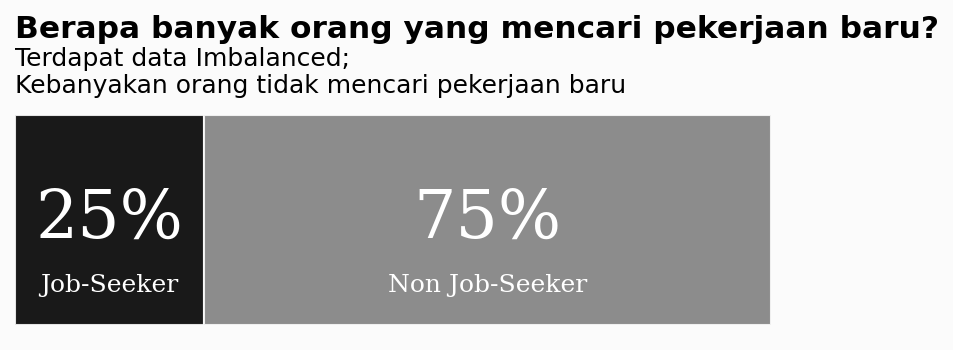

In [ ]:
x=df.groupby(['target'])['target'].count()
y=len(df)
r=((x/y)).round(2)
ratio = pd.DataFrame(r).T


fig, ax = plt.subplots(1,1,figsize=(6.5, 2),dpi=150)
background_color = "#fbfbfb"
fig.patch.set_facecolor(background_color)
ax.set_facecolor(background_color)

ax.barh(ratio.index, ratio[1.0], color='black', alpha=0.9, ec=background_color, label='Job-Seeker')
ax.barh(ratio.index, ratio[0.0], left=ratio[1.0], color='gray', alpha=0.9,ec=background_color, label='Non Job-Seeker')

ax.set_xlim(0, 1)
ax.set_xticks([])
ax.set_yticks([])
ax.legend().set_visible(False)
for s in ['top', 'left', 'right', 'bottom']:
    ax.spines[s].set_visible(False)

for i in ratio.index:
    ax.annotate(f"{int(ratio[1.0][i]*100)}%", xy=(ratio[1.0][i]/2, i),va = 'center', ha='center',fontsize=32, fontweight='light', fontfamily='serif',color='white')
    ax.annotate("Job-Seeker", xy=(ratio[1.0][i]/2, -0.25),va = 'center', ha='center',fontsize=12, fontweight='light', fontfamily='serif',color='white')


for i in ratio.index:
    ax.annotate(f"{int(ratio[0.0][i]*100)}%", xy=(ratio[1.0][i]+ratio[0.0][i]/2, i),va = 'center', ha='center',fontsize=32, fontweight='light', fontfamily='serif',color='white')
    ax.annotate("Non Job-Seeker", xy=(ratio[1.0][i]+ratio[0.0][i]/2, -0.25),va = 'center', ha='center',fontsize=12, fontweight='light', fontfamily='serif',color='white')


fig.text(0.125,1.1,'Berapa banyak orang yang mencari pekerjaan baru?',fontsize=15, fontweight='bold')
fig.text(0.125,0.915,'Terdapat data Imbalanced;\nKebanyakan orang tidak mencari pekerjaan baru',fontsize=12)


plt.show()

Kita memiliki kumpulan data yang tidak seimbang - yaitu, jumlah orang yang tidak mencari pekerjaan lebih banyak daripada yang mencari pekerjaan.

Ini adalah masalah yang dapat kita atasi nanti. Untuk saat ini, mari kita lanjutkan penjelajahan data

In [ ]:
df


enrollee_id      city  city_development_index gender  \
0             8949  city_103                   0.920   Male   
1            29725   city_40                   0.776   Male   
2            11561   city_21                   0.624    NaN   
3            33241  city_115                   0.789    NaN   
4              666  city_162                   0.767   Male   
...            ...       ...                     ...    ...   
19153         7386  city_173                   0.878   Male   
19154        31398  city_103                   0.920   Male   
19155        24576  city_103                   0.920   Male   
19156         5756   city_65                   0.802   Male   
19157        23834   city_67                   0.855    NaN   

           relevent_experience enrolled_university education_level  \
0      Has relevent experience       no_enrollment        Graduate   
1       No relevent experience       no_enrollment        Graduate   
2       No relevent experience    Full time course        Graduate   
3       No relevent experience                 NaN        Graduate   
4      Has relevent experience       no_enrollment         Masters   
...                        ...                 ...             ...   
19153   No relevent experience       no_enrollment        Graduate   
19154  Has relevent experience       no_enrollment        Graduate   
19155  Has relevent experience       no_enrollment        Graduate   
19156  Has relevent experience       no_enrollment     High School   
19157   No relevent experience       no_enrollment  Primary School   

      major_discipline experience company_size    company_type last_new_job  \
0                 STEM        >20          NaN             NaN            1   
1                 STEM         15        50-99         Pvt Ltd           >4   
2                 STEM          5          NaN             NaN        never   
3      Business Degree         <1          NaN         Pvt Ltd        never   
4                 STEM        >20        50-99  Funded Startup            4   
...                ...        ...          ...             ...          ...   
19153       Humanities         14          NaN             NaN            1   
19154             STEM         14          NaN             NaN            4   
19155             STEM        >20        50-99         Pvt Ltd            4   
19156              NaN         <1      500-999         Pvt Ltd            2   
19157              NaN          2          NaN             NaN            1   

       training_hours  target  
0                  36     1.0  
1                  47     0.0  
2                  83     0.0  
3                  52     1.0  
4                   8     0.0  
...               ...     ...  
19153              42     1.0  
19154              52     1.0  
19155              44     0.0  
19156              97     0.0  
19157             127     0.0  

[19158 rows x 14 columns]

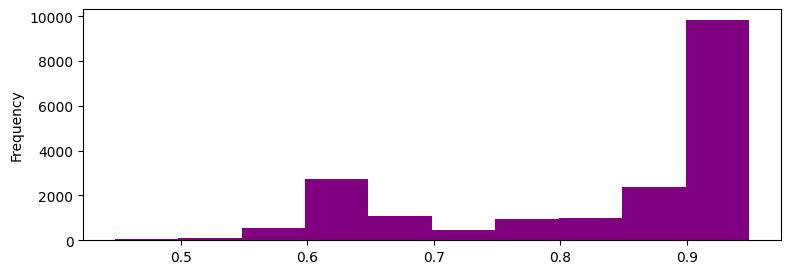

city_development_index
0.920    5200
0.624    2702
0.910    1533
0.926    1336
0.698     683
         ... 
0.649       4
0.807       4
0.781       3
0.625       3
0.664       1
Name: count, Length: 93, dtype: int64 

null value number -- > 0 



In [ ]:
#city_development_index
plt.figure(figsize=(9,3))
plt.hist(df["city_development_index"], color="purple")
plt.ylabel("Frequency")
plt.show()

print("{} \n".format(df["city_development_index"].value_counts()))
print("null value number -- > {} \n".format(df["city_development_index"].isnull().sum()))


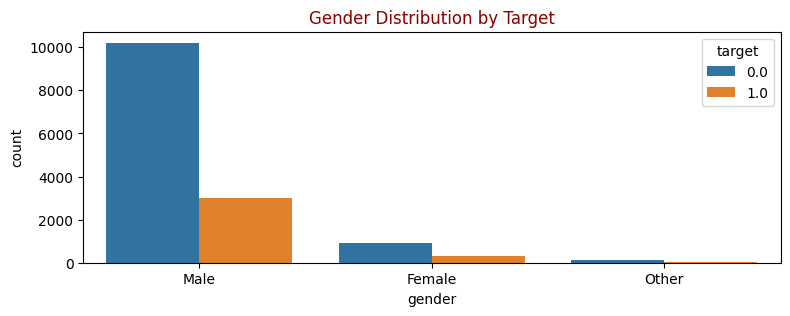

gender
Male      13221
Female     1238
Other       191
Name: count, dtype: int64
Null value number -- > 4508 



In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

gender = df["gender"].value_counts()


plt.figure(figsize=(9, 3))
sns.countplot(x="gender", hue="target", data=df)
plt.title("Gender Distribution by Target", color="darkred")
plt.show()

# Menampilkan jumlah data gender dan null values
print(gender)
print(f"Null value number -- > {df['gender'].isnull().sum()} \n")


di sini kita melihat bahwa jumlah pria lebih banyak daripada yang lain.

Juga, kita melihat bahwa ada terlalu banyak  nilai null.

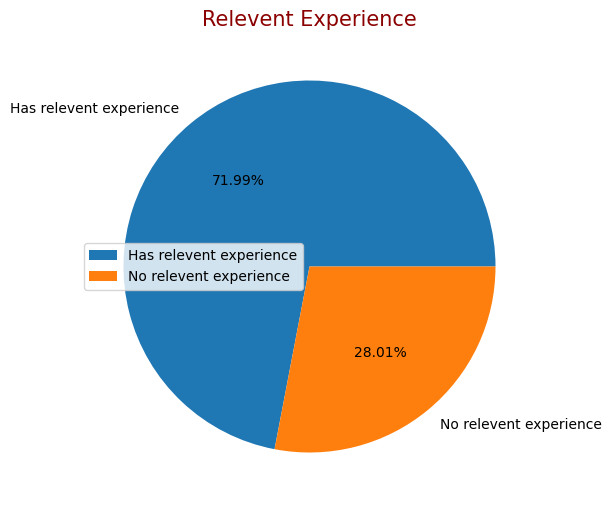

relevent_experience
Has relevent experience    13792
No relevent experience      5366
Name: count, dtype: int64
null value number -- > 0 



In [ ]:
#relevent_experience
experience = df["relevent_experience"].value_counts()
data_index = experience.index
data_values = experience.values

plt.figure(figsize = (6,8))
plt.pie(data_values, labels=data_index, autopct='%1.2f%%')
plt.title('Relevent Experience',color = 'darkred',fontsize = 15)
plt.legend()
plt.show()

print(experience)
print("null value number -- > {} \n".format(df["relevent_experience"].isnull().sum()))

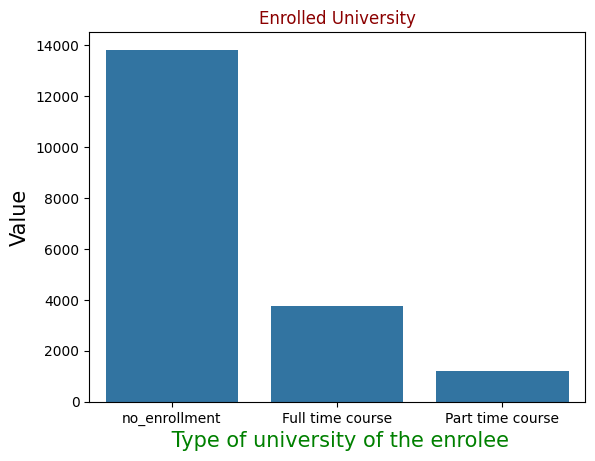

enrolled_university
no_enrollment       13817
Full time course     3757
Part time course     1198
Name: count, dtype: int64
null value number -- > 386 



In [ ]:
#enrolled_university
university = df["enrolled_university"].value_counts()

ax= sns.barplot(x=university.index, y=university.values)
plt.xlabel(' Type of university of the enrolee', size = 15, color = "green")
plt.ylabel('Value', size = 15)
plt.title('Enrolled University', color = "darkred")
plt.show()

print(university)
print("null value number -- > {} \n".format(df["enrolled_university"].isnull().sum()))

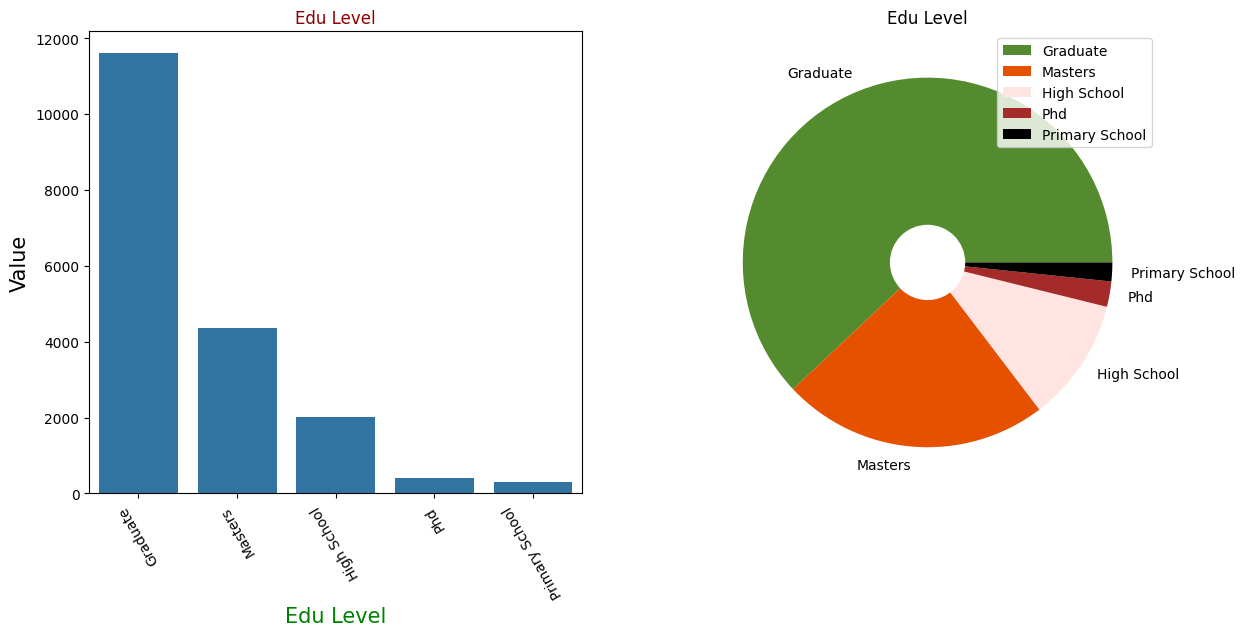

education_level
Graduate          11598
Masters            4361
High School        2017
Phd                 414
Primary School      308
Name: count, dtype: int64
null value number -- > 460 



In [ ]:
#education_level
colors = ['#558B2F','#E65100','#FFE4E1','#A52A2A','black']
edu_level = df["education_level"].value_counts()

plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
ax= sns.barplot(x=edu_level.index, y=edu_level.values)
plt.xlabel('Edu Level', size = 15, color = "green")
plt.xticks(rotation = 120)
plt.ylabel('Value', size = 15)
plt.title('Edu Level', color = "darkred")

plt.subplot(1,2,2)
circle = plt.Circle((0,0),0.2,color = "white")
plt.pie(edu_level.values, labels = edu_level.index, colors = colors)
p = plt.gcf()
p.gca().add_artist(circle)
plt.title("Edu Level")
plt.legend()
plt.show()

print(edu_level)
print("null value number -- > {} \n".format(df["education_level"].isnull().sum()))


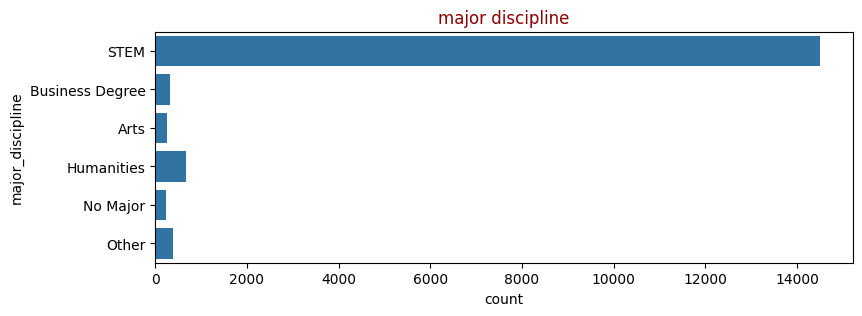

major_discipline
STEM               14492
Humanities           669
Other                381
Business Degree      327
Arts                 253
No Major             223
Name: count, dtype: int64
null value number -- > 2813 



In [ ]:
# major_discipline
mj_discipline = df["major_discipline"].value_counts()

plt.figure(figsize=(9,3))
sns.countplot(df["major_discipline"])
plt.title("major discipline", color = "darkred")
plt.show()

print(mj_discipline)
print("null value number -- > {} \n".format(df["major_discipline"].isnull().sum()))

In [ ]:
#experience
print("{} \n".format(df["experience"].value_counts()))
print("null value number -- > {} \n".format(df["experience"].isnull().sum()))


experience
>20    3286
5      1430
4      1403
3      1354
6      1216
2      1127
7      1028
10      985
9       980
8       802
15      686
11      664
14      586
1       549
<1      522
16      508
12      494
13      399
17      342
19      304
18      280
20      148
Name: count, dtype: int64 

null value number -- > 65 



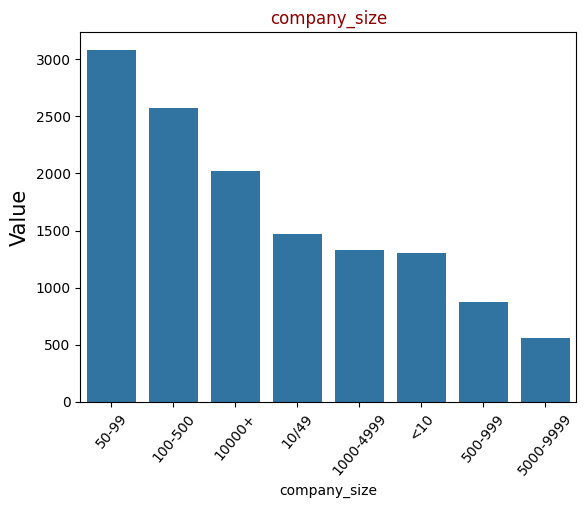

company_size
50-99        3083
100-500      2571
10000+       2019
10/49        1471
1000-4999    1328
<10          1308
500-999       877
5000-9999     563
Name: count, dtype: int64
null value number -- > 5938 



In [ ]:
#company_size
company_size = df["company_size"].value_counts()

ax= sns.barplot(x=company_size.index, y=company_size.values)
plt.ylabel('Value', size = 15)
plt.xticks(rotation = 50)
plt.title('company_size', color = "darkred")
plt.show()

print(company_size)
print("null value number -- > {} \n".format(df["company_size"].isnull().sum()))

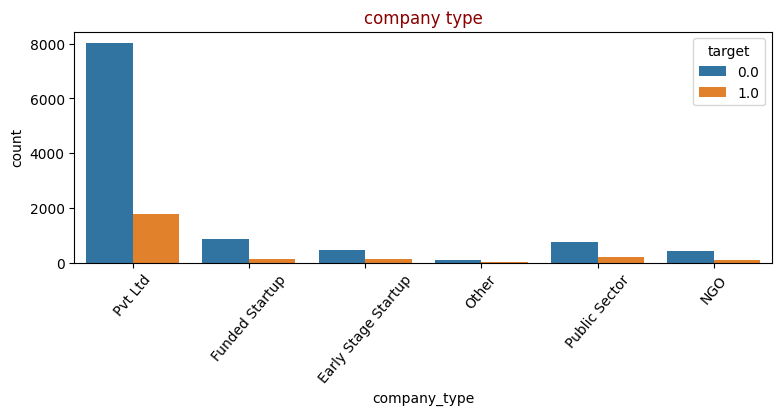

company_type
Pvt Ltd                9817
Funded Startup         1001
Public Sector           955
Early Stage Startup     603
NGO                     521
Other                   121
Name: count, dtype: int64
null value number -- > 6140 



In [ ]:
#company_type
company_type = df["company_type"].value_counts()

plt.figure(figsize=(9,3))
# Removed df["company_type"] and used x="company_type" instead
sns.countplot(x="company_type", hue="target", data=df)
plt.xticks(rotation=50)
plt.title("company type", color="darkred")
plt.show()

print(company_type)
print("null value number -- > {} \n".format(df["company_type"].isnull().sum()))

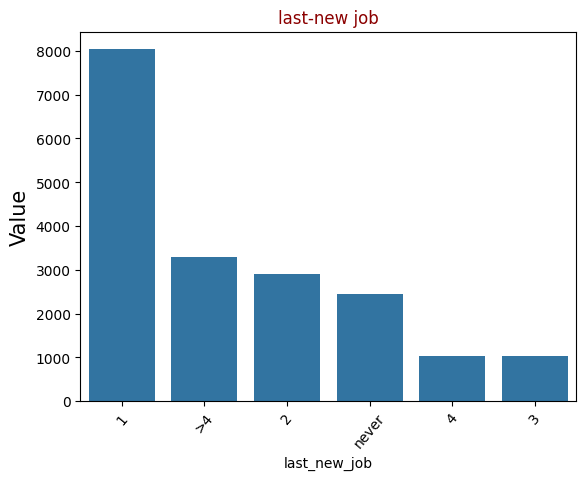

last_new_job
1        8040
>4       3290
2        2900
never    2452
4        1029
3        1024
Name: count, dtype: int64
null value number -- > 423 



In [ ]:
# last_new_job
last_new = df["last_new_job"].value_counts()

ax= sns.barplot(x=last_new.index, y=last_new.values)
plt.ylabel('Value', size = 15)
plt.xticks(rotation = 50)
plt.title('last-new job', color = "darkred")
plt.show()

print(last_new)
print("null value number -- > {} \n".format(df["last_new_job"].isnull().sum()))

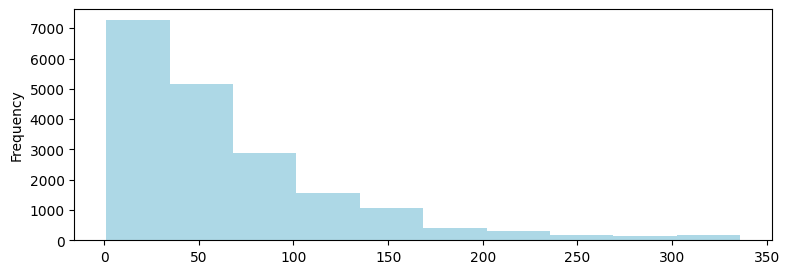

training_hours
28     329
12     292
18     291
22     282
50     279
      ... 
266      6
234      5
272      5
286      5
238      4
Name: count, Length: 241, dtype: int64 

null value number -- > 0 



In [ ]:

plt.figure(figsize=(9,3))
plt.hist(df["training_hours"], color="lightblue")
plt.ylabel("Frequency")
plt.show()

print("{} \n".format(df["training_hours"].value_counts()))
print("null value number -- > {} \n".format(df["training_hours"].isnull().sum()))

## Descriptive Statistics

In [ ]:
df.sample(5)

enrollee_id      city  city_development_index gender  \
921          18859  city_162                   0.767   Male   
14992         7363   city_21                   0.624   Male   
9872         13828   city_16                   0.910   Male   
3283          9912   city_77                   0.830   Male   
6182         12522  city_149                   0.689    NaN   

           relevent_experience enrolled_university education_level  \
921     No relevent experience    Full time course     High School   
14992   No relevent experience    Full time course     High School   
9872   Has relevent experience       no_enrollment        Graduate   
3283   Has relevent experience       no_enrollment         Masters   
6182   Has relevent experience       no_enrollment        Graduate   

      major_discipline experience company_size company_type last_new_job  \
921                NaN          3          NaN          NaN        never   
14992              NaN          6          NaN          NaN        never   
9872              STEM        >20      100-500      Pvt Ltd           >4   
3283              STEM         10        10/49      Pvt Ltd            1   
6182              STEM         12        10/49          NaN            4   

       training_hours  target  
921                49     0.0  
14992              21     0.0  
9872               83     0.0  
3283               45     0.0  
6182              105     0.0

In [ ]:
df.shape

(19158, 14)

kita punya 19158 data dengan 14 features

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  object 
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  last_new_job            18735 non-null  object 
 12  training_hours          19158 non-null  int64  
 13  target                  19158 non-null  float64
dtypes: float64(2), int64(2), object(10)
me

In [ ]:
df.nunique()

enrollee_id               19158
city                        123
city_development_index       93
gender                        3
relevent_experience           2
enrolled_university           3
education_level               5
major_discipline              6
experience                   22
company_size                  8
company_type                  6
last_new_job                  6
training_hours              241
target                        2
dtype: int64

In [ ]:
# Pengelompokan kolom berdasarkan jenis
nums= ['enrollee_id', 'city_development_index', 'training_hours', 'target']
cats=['city', 'gender', 'relevent_experience', 'enrolled_university', 'education_level', 'major_discipline', 'experience', 'company_size', 'company_type', 'last_new_job']


In [ ]:
df[nums].describe().T

count          mean          std    min      25%  \
enrollee_id             19158.0  16875.358179  9616.292592  1.000  8554.25   
city_development_index  19158.0      0.828848     0.123362  0.448     0.74   
training_hours          19158.0     65.366896    60.058462  1.000    23.00   
target                  19158.0      0.249348     0.432647  0.000     0.00   

                              50%       75%        max  
enrollee_id             16982.500  25169.75  33380.000  
city_development_index      0.903      0.92      0.949  
training_hours             47.000     88.00    336.000  
target                      0.000      0.00      1.000

In [ ]:
df[cats].describe().T

count unique                      top   freq
city                 19158    123                 city_103   4355
gender               14650      3                     Male  13221
relevent_experience  19158      2  Has relevent experience  13792
enrolled_university  18772      3            no_enrollment  13817
education_level      18698      5                 Graduate  11598
major_discipline     16345      6                     STEM  14492
experience           19093     22                      >20   3286
company_size         13220      8                    50-99   3083
company_type         13018      6                  Pvt Ltd   9817
last_new_job         18735      6                        1   8040

In [ ]:
for col in cats:
    print(f'''Value count kolom {col}:''')
    print(df[col].value_counts())
    print()

Value count kolom city:
city
city_103    4355
city_21     2702
city_16     1533
city_114    1336
city_160     845
            ... 
city_129       3
city_111       3
city_121       3
city_140       1
city_171       1
Name: count, Length: 123, dtype: int64

Value count kolom gender:
gender
Male      13221
Female     1238
Other       191
Name: count, dtype: int64

Value count kolom relevent_experience:
relevent_experience
Has relevent experience    13792
No relevent experience      5366
Name: count, dtype: int64

Value count kolom enrolled_university:
enrolled_university
no_enrollment       13817
Full time course     3757
Part time course     1198
Name: count, dtype: int64

Value count kolom education_level:
education_level
Graduate          11598
Masters            4361
High School        2017
Phd                 414
Primary School      308
Name: count, dtype: int64

Value count kolom major_discipline:
major_discipline
STEM               14492
Humanities           669
Other              

## Univariate Analysis

Analysis kolom enrollee_id:
count    19158.000000
mean     16875.358179
std       9616.292592
min          1.000000
25%       8554.250000
50%      16982.500000
75%      25169.750000
max      33380.000000
Name: enrollee_id, dtype: float64


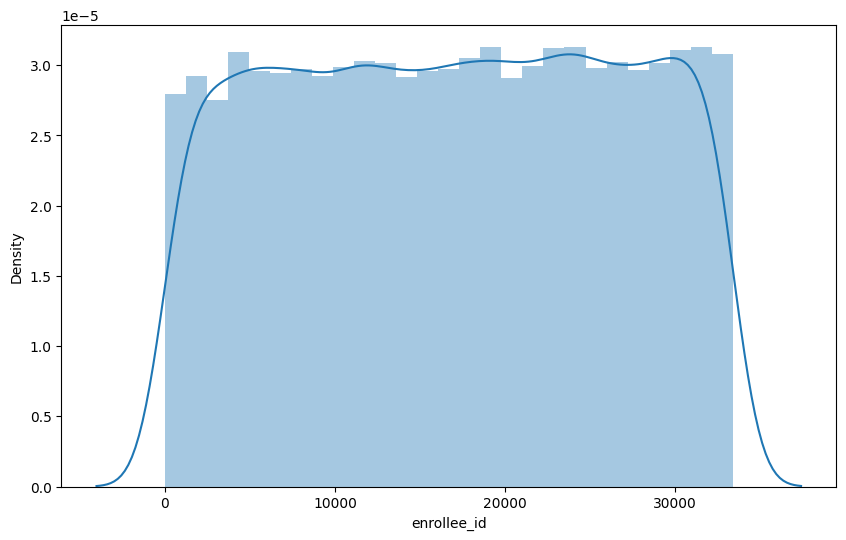


Analysis kolom city_development_index:
count    19158.000000
mean         0.828848
std          0.123362
min          0.448000
25%          0.740000
50%          0.903000
75%          0.920000
max          0.949000
Name: city_development_index, dtype: float64


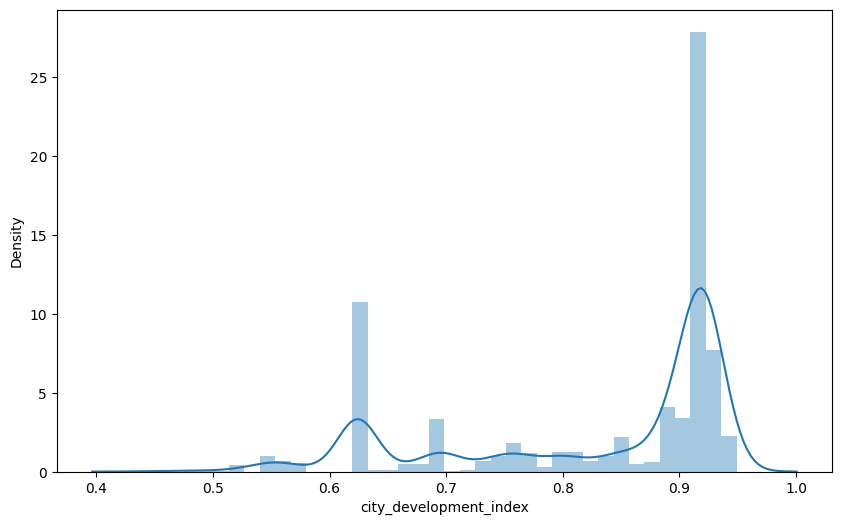


Analysis kolom training_hours:
count    19158.000000
mean        65.366896
std         60.058462
min          1.000000
25%         23.000000
50%         47.000000
75%         88.000000
max        336.000000
Name: training_hours, dtype: float64


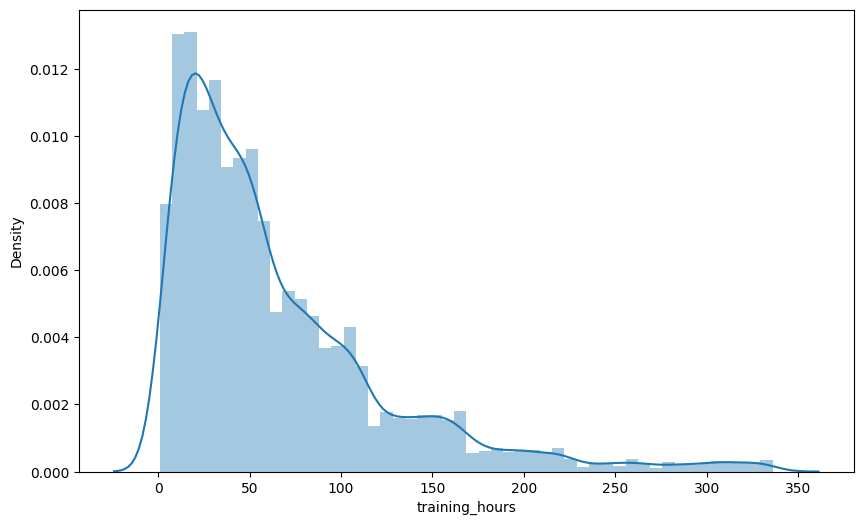


Analysis kolom target:
count    19158.000000
mean         0.249348
std          0.432647
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: target, dtype: float64


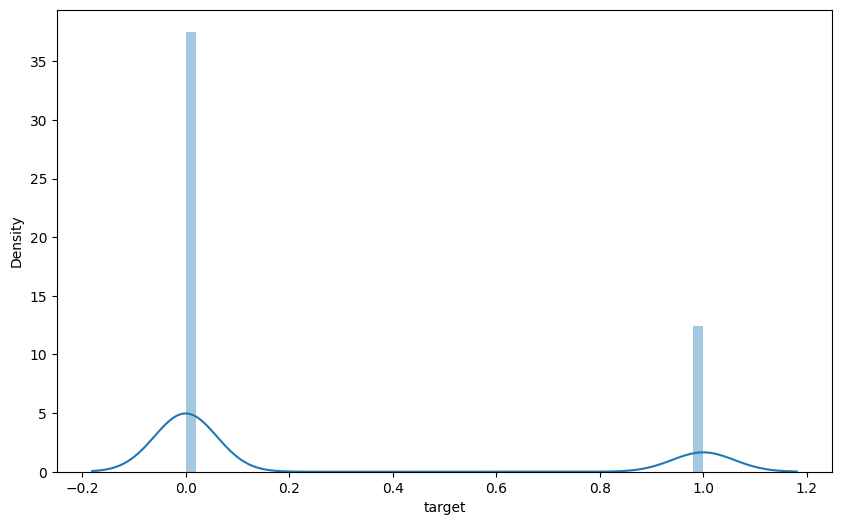

In [ ]:
# Numerical features
for col in nums:
    print(f'''Analysis kolom {col}:''')
    print(df[col].describe())
    plt.figure(figsize=(10,6))
    sns.distplot(df[col])
    plt.show()
    print()

Analysis kolom city:
count        19158
unique         123
top       city_103
freq          4355
Name: city, dtype: object


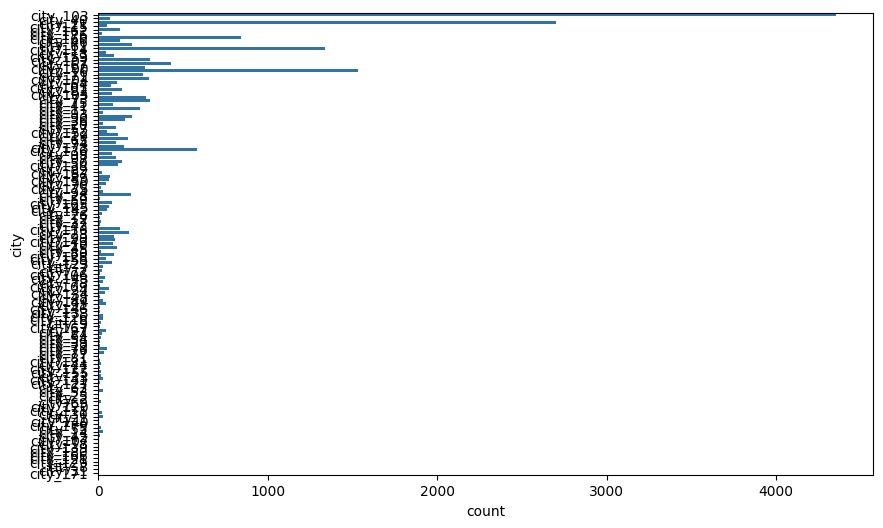


Analysis kolom gender:
count     14650
unique        3
top        Male
freq      13221
Name: gender, dtype: object


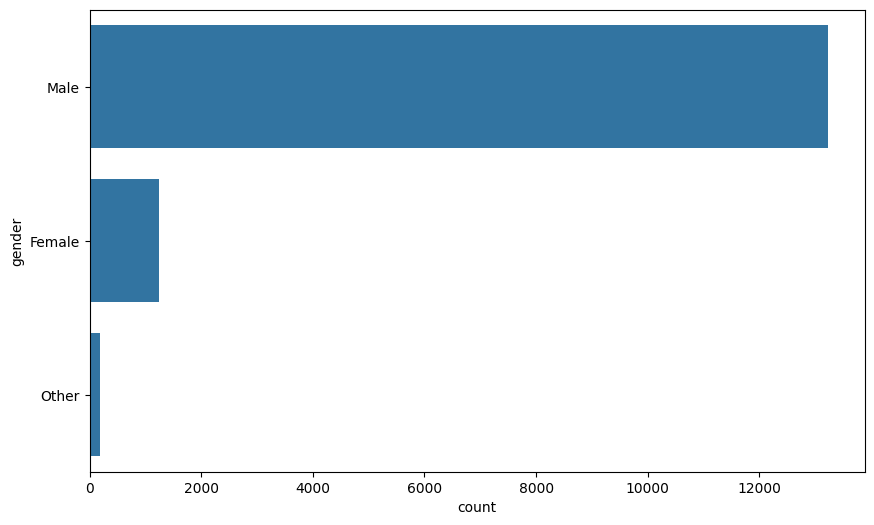


Analysis kolom relevent_experience:
count                       19158
unique                          2
top       Has relevent experience
freq                        13792
Name: relevent_experience, dtype: object


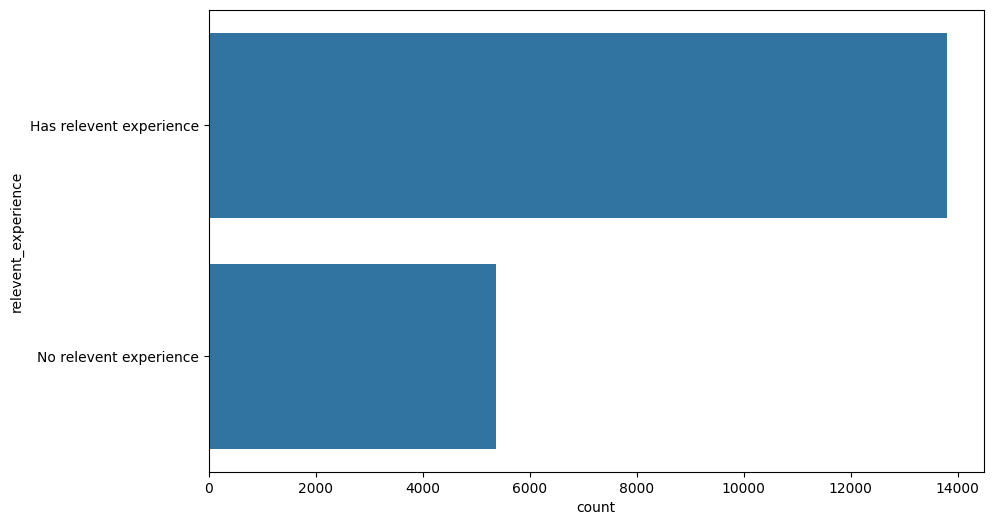


Analysis kolom enrolled_university:
count             18772
unique                3
top       no_enrollment
freq              13817
Name: enrolled_university, dtype: object


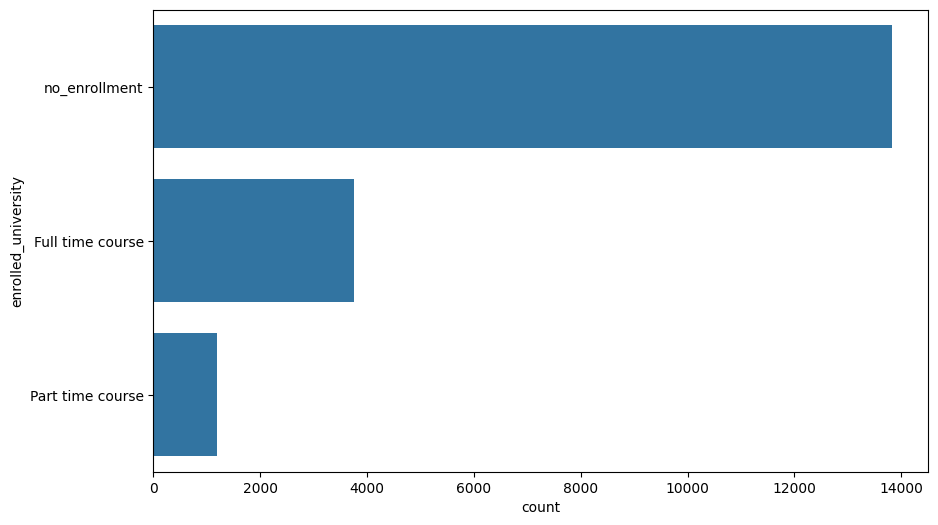


Analysis kolom education_level:
count        18698
unique           5
top       Graduate
freq         11598
Name: education_level, dtype: object


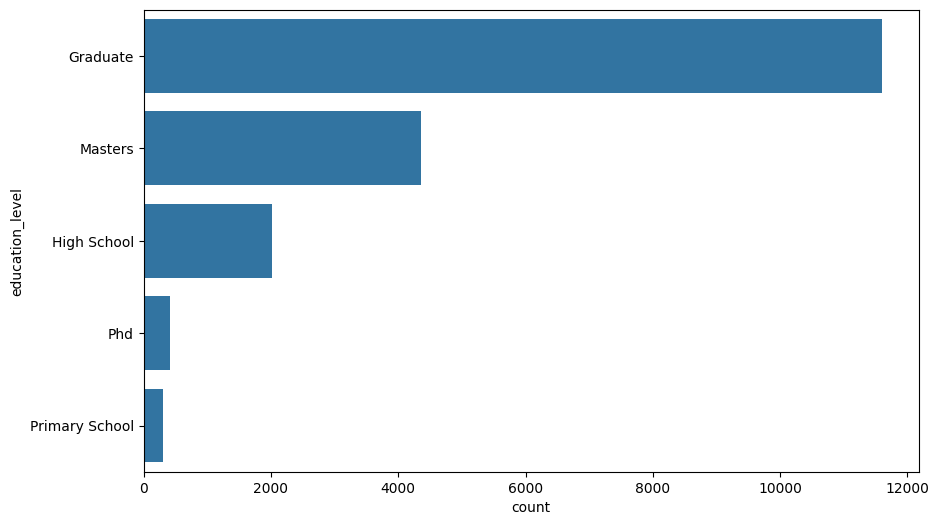


Analysis kolom major_discipline:
count     16345
unique        6
top        STEM
freq      14492
Name: major_discipline, dtype: object


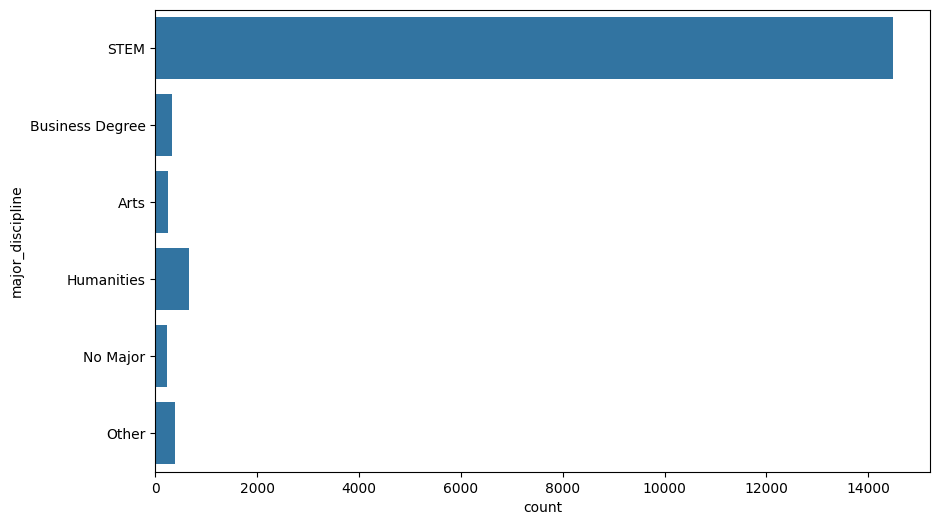


Analysis kolom experience:
count     19093
unique       22
top         >20
freq       3286
Name: experience, dtype: object


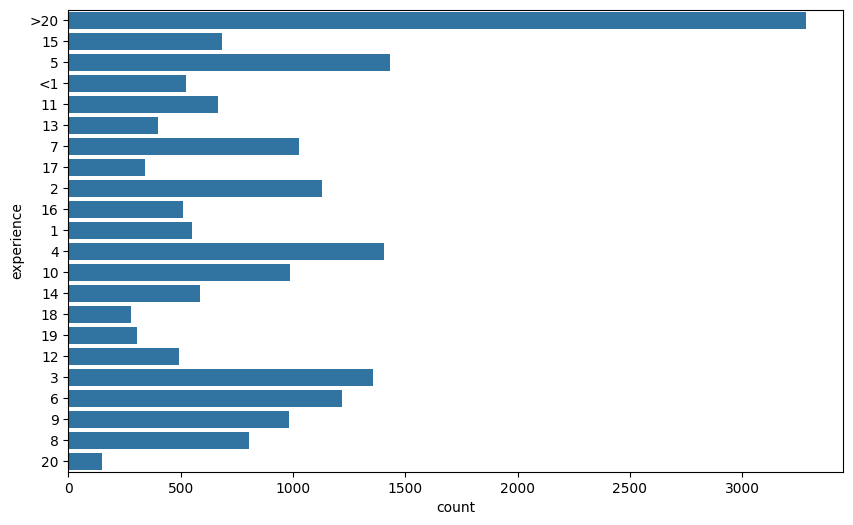


Analysis kolom company_size:
count     13220
unique        8
top       50-99
freq       3083
Name: company_size, dtype: object


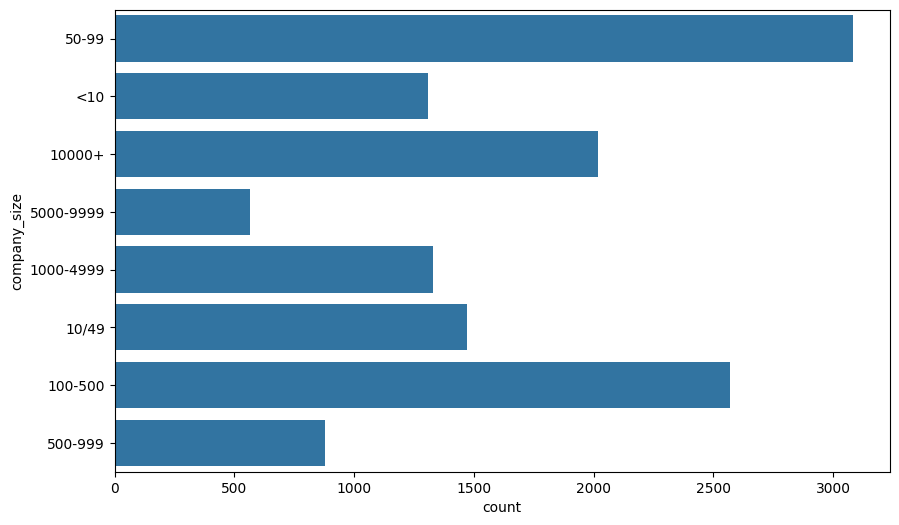


Analysis kolom company_type:
count       13018
unique          6
top       Pvt Ltd
freq         9817
Name: company_type, dtype: object


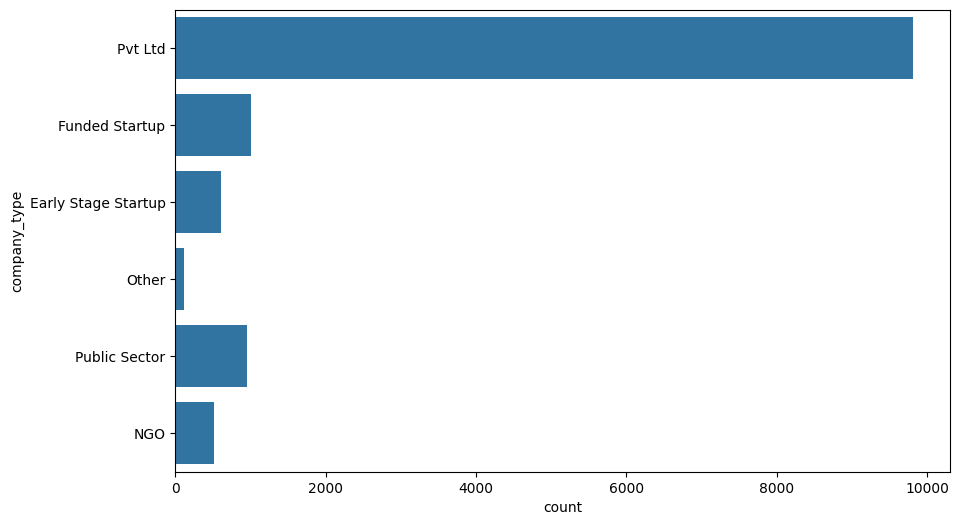


Analysis kolom last_new_job:
count     18735
unique        6
top           1
freq       8040
Name: last_new_job, dtype: object


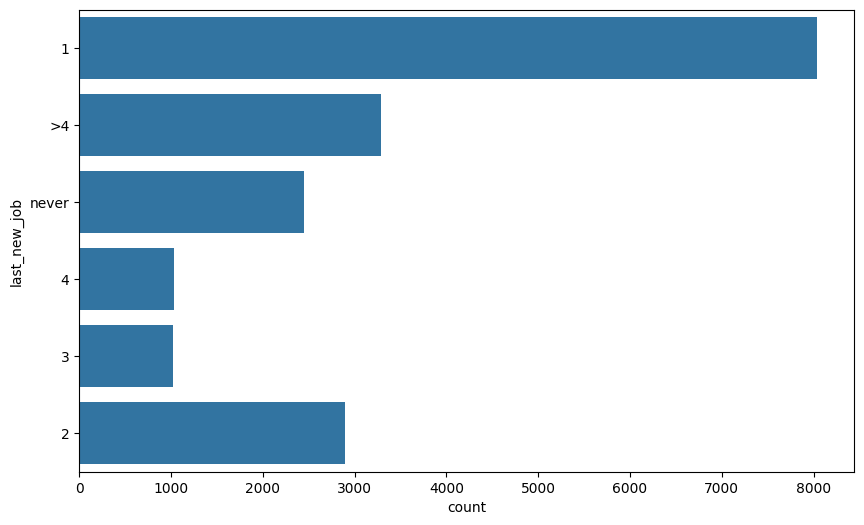

In [ ]:
# Categorical features
for col in cats:
    print(f'''Analysis kolom {col}:''')
    print(df[col].describe())
    plt.figure(figsize=(10,6))
    sns.countplot(df[col])
    plt.show()
    print()

## Multivariate Analysis

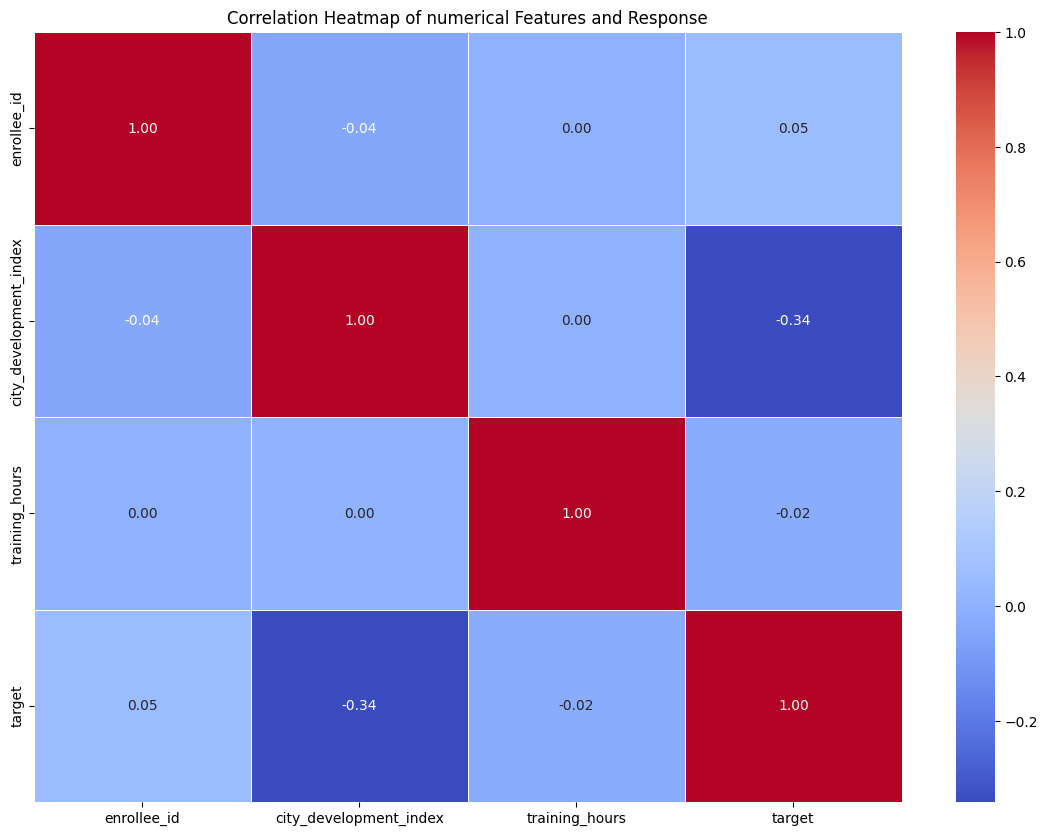

In [ ]:
# Combine numerical features and the response feature
correlation_num = nums

# Calculate correlation matrix including the response feature
correlation_numerical = df[correlation_num].corr()

# Plot heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_numerical, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap of numerical Features and Response')
plt.show()

In [ ]:
df[df['experience']=='<1']

enrollee_id      city  city_development_index  gender  \
3            33241  city_115                   0.789     NaN   
23            7041   city_40                   0.776    Male   
71           17271   city_21                   0.624    Male   
74           29117   city_11                   0.550     NaN   
86           30937   city_57                   0.866  Female   
...            ...       ...                     ...     ...   
19042        29449  city_128                   0.527     NaN   
19084         6808   city_16                   0.910     NaN   
19114        12539   city_21                   0.624     NaN   
19125        20996   city_74                   0.579    Male   
19156         5756   city_65                   0.802    Male   

           relevent_experience enrolled_university education_level  \
3       No relevent experience                 NaN        Graduate   
23     Has relevent experience       no_enrollment        Graduate   
71      No relevent experience    Full time course        Graduate   
74      No relevent experience    Full time course        Graduate   
86      No relevent experience    Part time course        Graduate   
...                        ...                 ...             ...   
19042   No relevent experience    Full time course        Graduate   
19084  Has relevent experience       no_enrollment        Graduate   
19114   No relevent experience       no_enrollment         Masters   
19125   No relevent experience    Full time course        Graduate   
19156  Has relevent experience       no_enrollment     High School   

      major_discipline experience company_size company_type last_new_job  \
3      Business Degree         <1          NaN      Pvt Ltd        never   
23          Humanities         <1    1000-4999      Pvt Ltd            1   
71                STEM         <1          NaN          NaN        never   
74                STEM         <1          NaN          NaN        never   
86                STEM         <1        10/49      Pvt Ltd            2   
...                ...        ...          ...          ...          ...   
19042             STEM         <1          NaN          NaN            1   
19084             STEM         <1          NaN          NaN            1   
19114             STEM         <1          <10          NaN           >4   
19125             STEM         <1          NaN          NaN        never   
19156              NaN         <1      500-999      Pvt Ltd            2   

       training_hours  target  
3                  52     1.0  
23                 65     0.0  
71                 18     1.0  
74                 12     0.0  
86                 83     0.0  
...               ...     ...  
19042              19     1.0  
19084              42     0.0  
19114             160     1.0  
19125              31     0.0  
19156              97     0.0  

[522 rows x 14 columns]

In [ ]:
# copy df untuk membuat dataframe baru yang akan dikonversi
df_temp = df.copy()
# ubah kolom-kolom kategorical ordinal dan ubah type data menjadi numerical
df_temp['education_level'] = df_temp['education_level'].replace({
    'Primary School': 1,
    'High School': 2,
    'Graduate': 3,
    'Masters': 4,
    'Phd': 5
}).astype(float)
df_temp['experience'] = df_temp['experience'].replace({
    '<1': 1,
    '2': 1,
    '3': 2,
    '4': 2,
    '5': 2,
    '6': 3,
    '7': 3,
    '8': 3,
    '9': 3,
    '10': 3,
    '11': 4,
    '12': 4,
    '13': 4,
    '14': 4,
    '15': 4,
    '16': 5,
    '17': 5,
    '18': 5,
    '19': 5,
    '20': 5,
    '>20': 5
}).astype(float)
df_temp['company_size'] = df_temp['company_size'].replace({
    '<10': 1,
    '10/49': 1,
    '50-99': 2,
    '100-500': 3,
    '500-999': 4,
    '1000-4999': 5,
    '5000-9999': 6,
    '10000+': 7
}).astype(float)
df_temp['last_new_job'] = df_temp['last_new_job'].replace({
    'never': 0,
    '1': 1,
    '2': 2,
    '3': 3,
    '4': 4,
    '>4': 5,

}).astype(float)


In [ ]:
# gabungkan kolom yang sudah dikonversi ke numerical dengan nilai numerical sebelumnya tanpa enrollee_id
nums_temp = ['city_development_index','education_level',
       'experience', 'company_size',
       'last_new_job', 'training_hours', 'target']

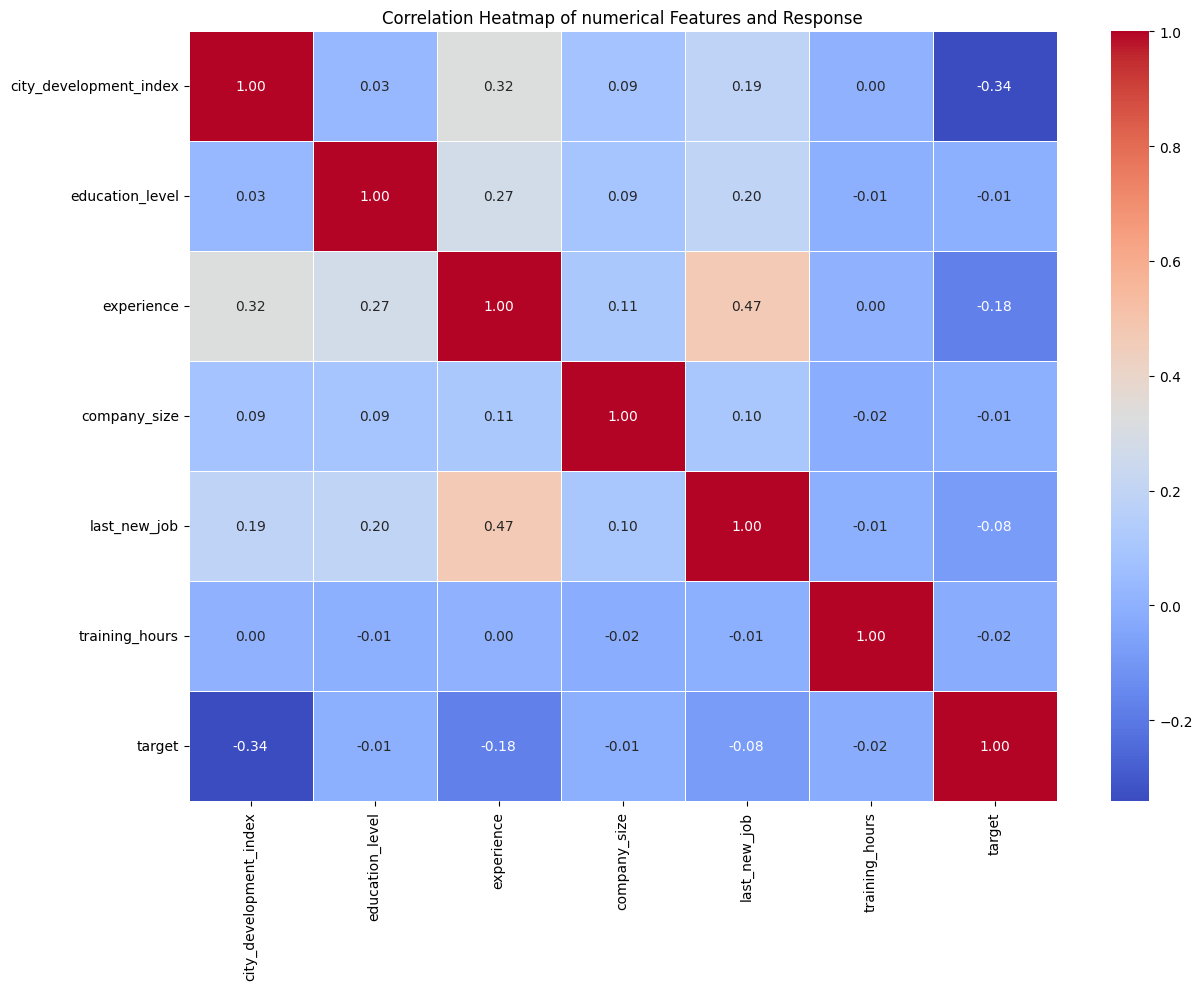

In [ ]:
# Combine numerical features and the response feature

# Calculate correlation matrix including the response feature
correlation_numerical_temp = df_temp[nums_temp].corr()

# Plot heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_numerical_temp, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap of numerical Features and Response')
plt.show()

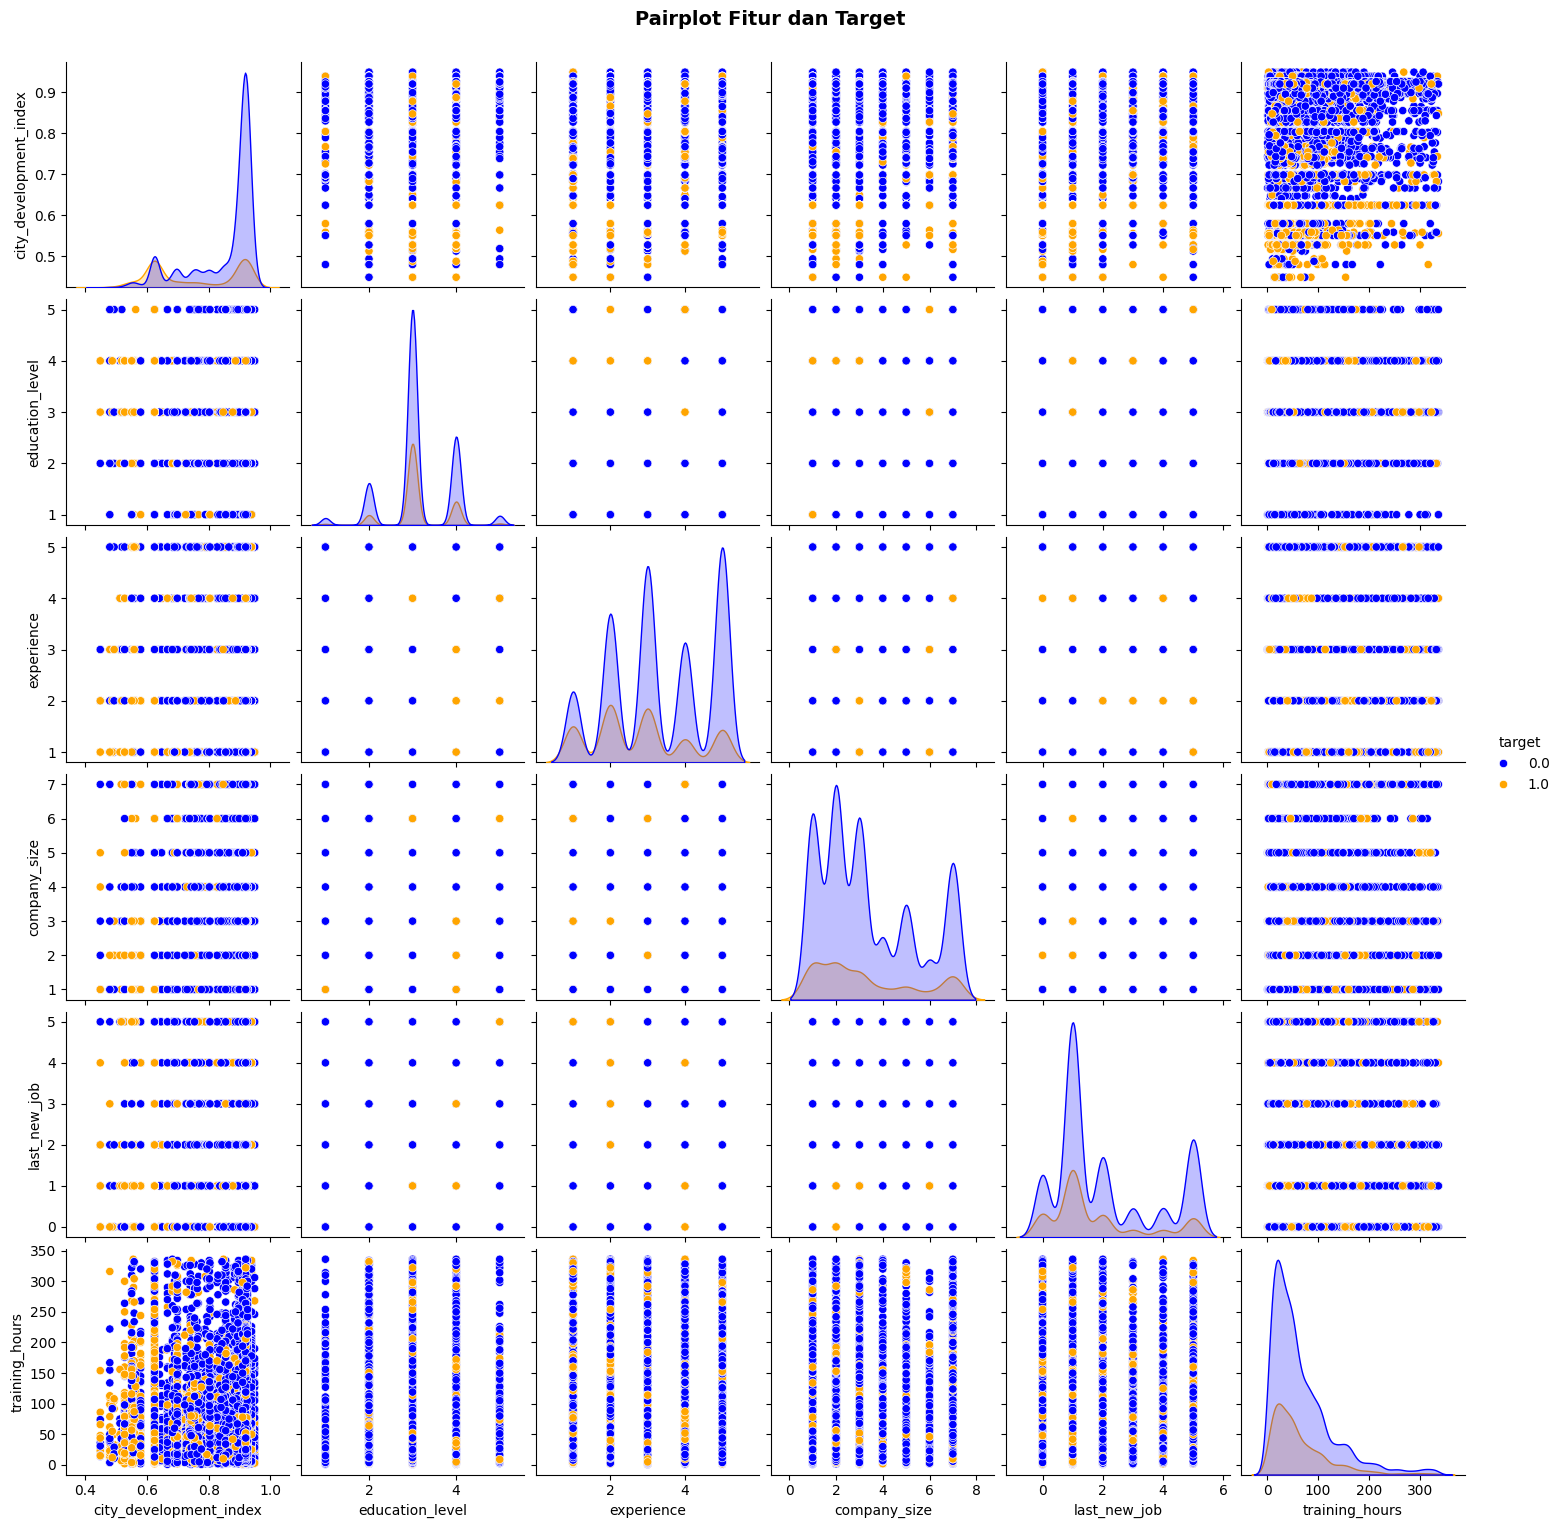

In [ ]:

# Create a pair plot with different colors for 'Response' feature
pair_plot = sns.pairplot(df_temp[nums_temp], hue='target', palette={0: 'blue', 1: 'orange'})

# Adjust the figure title
plt.suptitle('Pairplot Fitur dan Target ', fontsize=14, weight='bold', y=1.02)

# Show the plot
plt.show()

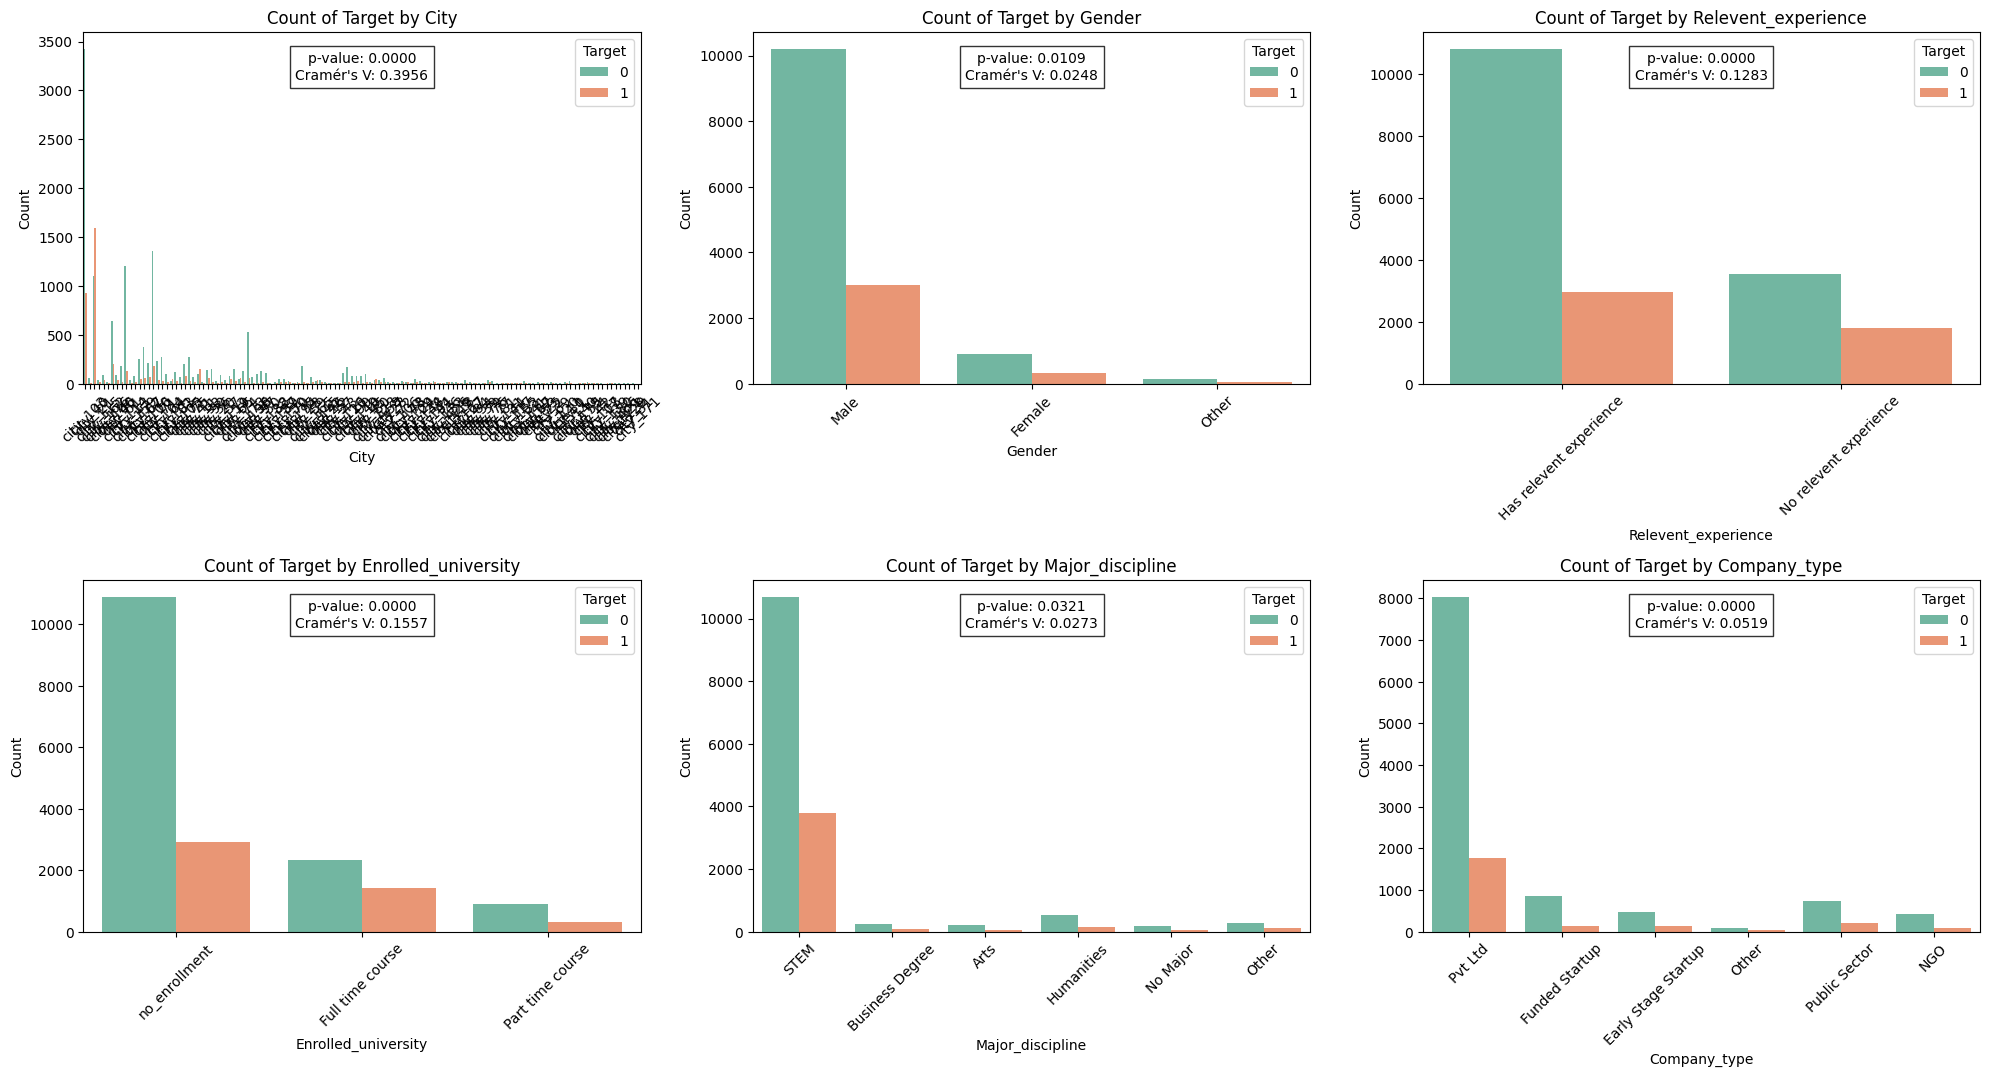

In [ ]:
from scipy.stats import chi2_contingency

# Daftar fitur kategori
cats_temp = ['city', 'gender', 'relevent_experience', 'enrolled_university',
             'major_discipline', 'company_type']

plt.figure(figsize=(20, 15))

# Loop untuk setiap fitur dalam cats_temp
for i, feature in enumerate(cats_temp):
    # Membuat subplot untuk count plot
    plt.subplot(3, 3, i + 1)
    sns.countplot(data=df_temp, x=feature, hue='target', palette='Set2')
    plt.title(f'Count of Target by {feature.capitalize()}')
    plt.xlabel(feature.capitalize())
    plt.ylabel('Count')
    plt.legend(title='Target', labels=['0', '1'])
    plt.xticks(rotation=45)  # Memutar label sumbu x sebesar 45 derajat

    # Membuat tabel kontingensi
    crosstab = pd.crosstab(df_temp[feature], df_temp['target'])

    # Melakukan uji Chi-Square
    chi2, p, dof, expected = chi2_contingency(crosstab)

    # Menghitung nilai Cramér's V
    n = np.sum(crosstab.values)
    phi2 = chi2 / n
    r, k = crosstab.shape
    cramers_v = np.sqrt(phi2 / min(k - 1, r - 1))

    # Menambahkan p-value dan Cramér's V sebagai anotasi di plot
    plt.annotate(f'p-value: {p:.4f}\nCramér\'s V: {cramers_v:.4f}',
                 xy=(0.5, 0.9), xycoords='axes fraction',
                 fontsize=10, ha='center', va='center',
                 bbox=dict(facecolor='white', alpha=0.8))

# Mengatur jarak antar subplot
plt.subplots_adjust(hspace=0.4, wspace=0.4)  # Menambahkan jarak antar grafik
plt.tight_layout()  # Mengatur layout
plt.show()

## Business Insight

# Stage 2 - Data Prepocessing

## Handle missing values

In [ ]:
print(" \t Columns with null \n -->",df.columns[df.isnull().any()])

 	 Columns with null 
 --> Index(['gender', 'enrolled_university', 'education_level', 'major_discipline',
       'experience', 'company_size', 'company_type', 'last_new_job'],
      dtype='object')


Hanya kolom city, city development index, relevent experience, training hours and target yang tidak memiliki missing values

In [ ]:
df.isna().sum()/len(df)


enrollee_id               0.000000
city                      0.000000
city_development_index    0.000000
gender                    0.235306
relevent_experience       0.000000
enrolled_university       0.020148
education_level           0.024011
major_discipline          0.146832
experience                0.003393
company_size              0.309949
company_type              0.320493
last_new_job              0.022080
training_hours            0.000000
target                    0.000000
dtype: float64

In [ ]:
# Cleansing and handling missing value
df['last_new_job'] = df['last_new_job'].apply(lambda x: 'Never' if x == 'never' else x) #just reads nicer
df['enrolled_university'][df['enrolled_university'] == 'no_enrollment'] = 'No Enrollment' #just reads nicer
df['company_size'] = df['company_size'].apply(lambda x: '10-49' if x == '10/49' else x) #diff replacement method

df['experience'] = df['experience'].apply(lambda x: '0' if x == '<1' else x)
df['experience'] = df['experience'].apply(lambda x: '21' if x == '>20' else x)


df['company_size'].fillna('0',inplace=True)
df['company_type'].fillna('Unknown',inplace=True)
df['major_discipline'].fillna('Unknown',inplace=True)
df['gender'].fillna('Other',inplace=True)


# This is what I mean with respect to the gender categories:

df['target'].groupby(df['gender']).mean()

gender
Female    0.263328
Male      0.227819
Other     0.306235
Name: target, dtype: float64

In [ ]:
df.isna().sum()/len(df)


enrollee_id               0.000000
city                      0.000000
city_development_index    0.000000
gender                    0.000000
relevent_experience       0.000000
enrolled_university       0.020148
education_level           0.024011
major_discipline          0.000000
experience                0.003393
company_size              0.000000
company_type              0.000000
last_new_job              0.022080
training_hours            0.000000
target                    0.000000
dtype: float64

In [ ]:
df.dropna(inplace=True)
df.dropna(inplace=True)
df.isna().sum()/len(df)

enrollee_id               0.0
city                      0.0
city_development_index    0.0
gender                    0.0
relevent_experience       0.0
enrolled_university       0.0
education_level           0.0
major_discipline          0.0
experience                0.0
company_size              0.0
company_type              0.0
last_new_job              0.0
training_hours            0.0
target                    0.0
dtype: float64

## Handle duplicated data

In [ ]:
df.duplicated().sum()


0

data ini tidak memiliki data duplikat

In [ ]:
# pengelompokan kolom berdasarkan jenisnya
cats = ['city', 'gender', 'relevent_experience', 'enrolled_university', 'major_discipline', 'experience', 'company_size', 'company_type', 'last_new_job']
nums = ['city_development_index', 'training_hours', 'target']

In [ ]:
df[cats].describe().T

count unique                      top   freq
city                 18014    123                 city_103   4194
gender               18014      3                     Male  12772
relevent_experience  18014      2  Has relevent experience  13190
enrolled_university  18014      3            No Enrollment  13348
major_discipline     18014      7                     STEM  13993
experience           18014     22                       21   3182
company_size         18014      9                        0   5310
company_type         18014      7                  Pvt Ltd   9475
last_new_job         18014      6                        1   7789

In [ ]:
df[nums].describe().T

count       mean        std    min     25%    50%  \
city_development_index  18014.0   0.831728   0.122115  0.448   0.745   0.91   
training_hours          18014.0  65.347896  60.059220  1.000  23.000  47.00   
target                  18014.0   0.245420   0.430348  0.000   0.000   0.00   

                          75%      max  
city_development_index   0.92    0.949  
training_hours          88.00  336.000  
target                   0.00    1.000

## Handle outliers

In [ ]:
df['city_development_index'].describe()

count    18014.000000
mean         0.831728
std          0.122115
min          0.448000
25%          0.745000
50%          0.910000
75%          0.920000
max          0.949000
Name: city_development_index, dtype: float64

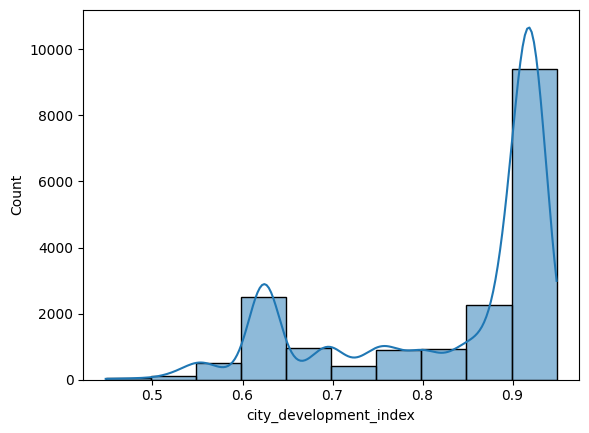

In [ ]:
sns.histplot(df['city_development_index'],bins=10,kde=True)
plt.show()

City development index memiliki nilai minimum 0.448000 dan nilai maximum 0.949000
Mean 0.828848 and Standard Deviation 0.123362

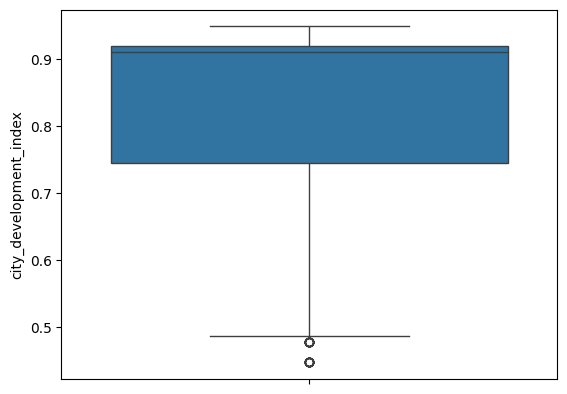

In [ ]:
sns.boxplot(df['city_development_index'])
plt.show()

In [ ]:
df['training_hours'].describe()

count    18014.000000
mean        65.347896
std         60.059220
min          1.000000
25%         23.000000
50%         47.000000
75%         88.000000
max        336.000000
Name: training_hours, dtype: float64

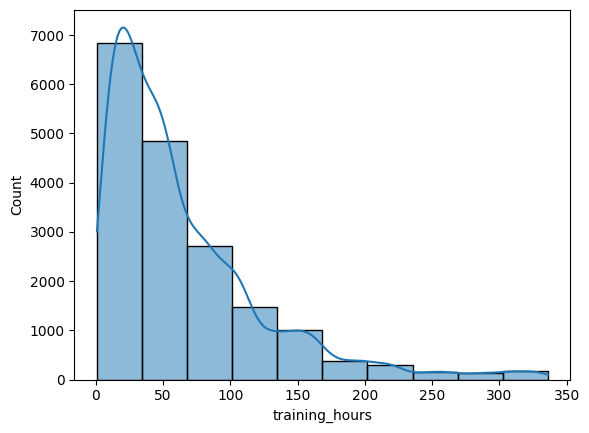

In [ ]:
sns.histplot(df['training_hours'],bins=10,kde=True)
plt.show()

Training Hours index memiliki nilai minimum 1 dan nilai maximum 336
Mean 65.366896 dan Standard Deviation 60.058462

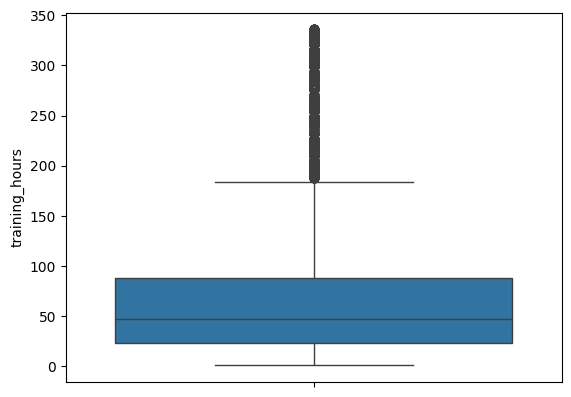

In [ ]:
sns.boxplot(df['training_hours'])
plt.show()

In [ ]:
df['target'].describe()

count    18014.000000
mean         0.245420
std          0.430348
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: target, dtype: float64

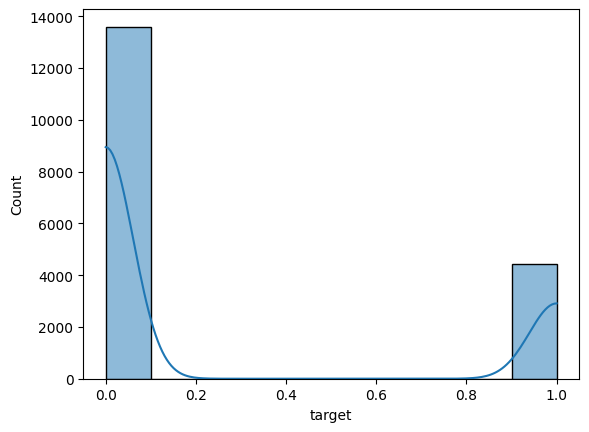

In [ ]:
sns.histplot(df['target'],bins=10,kde=True)
plt.show()

Target memiliki nilai minimum 0 dan nilai maximum 1
Mean 0.249348 dan Standard Deviation 0.432647


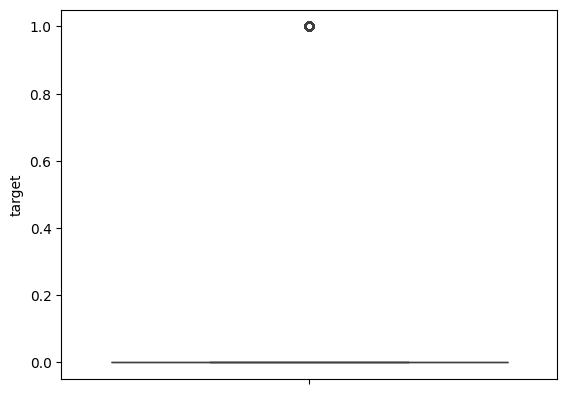

In [ ]:
sns.boxplot(df['target'])
plt.show()

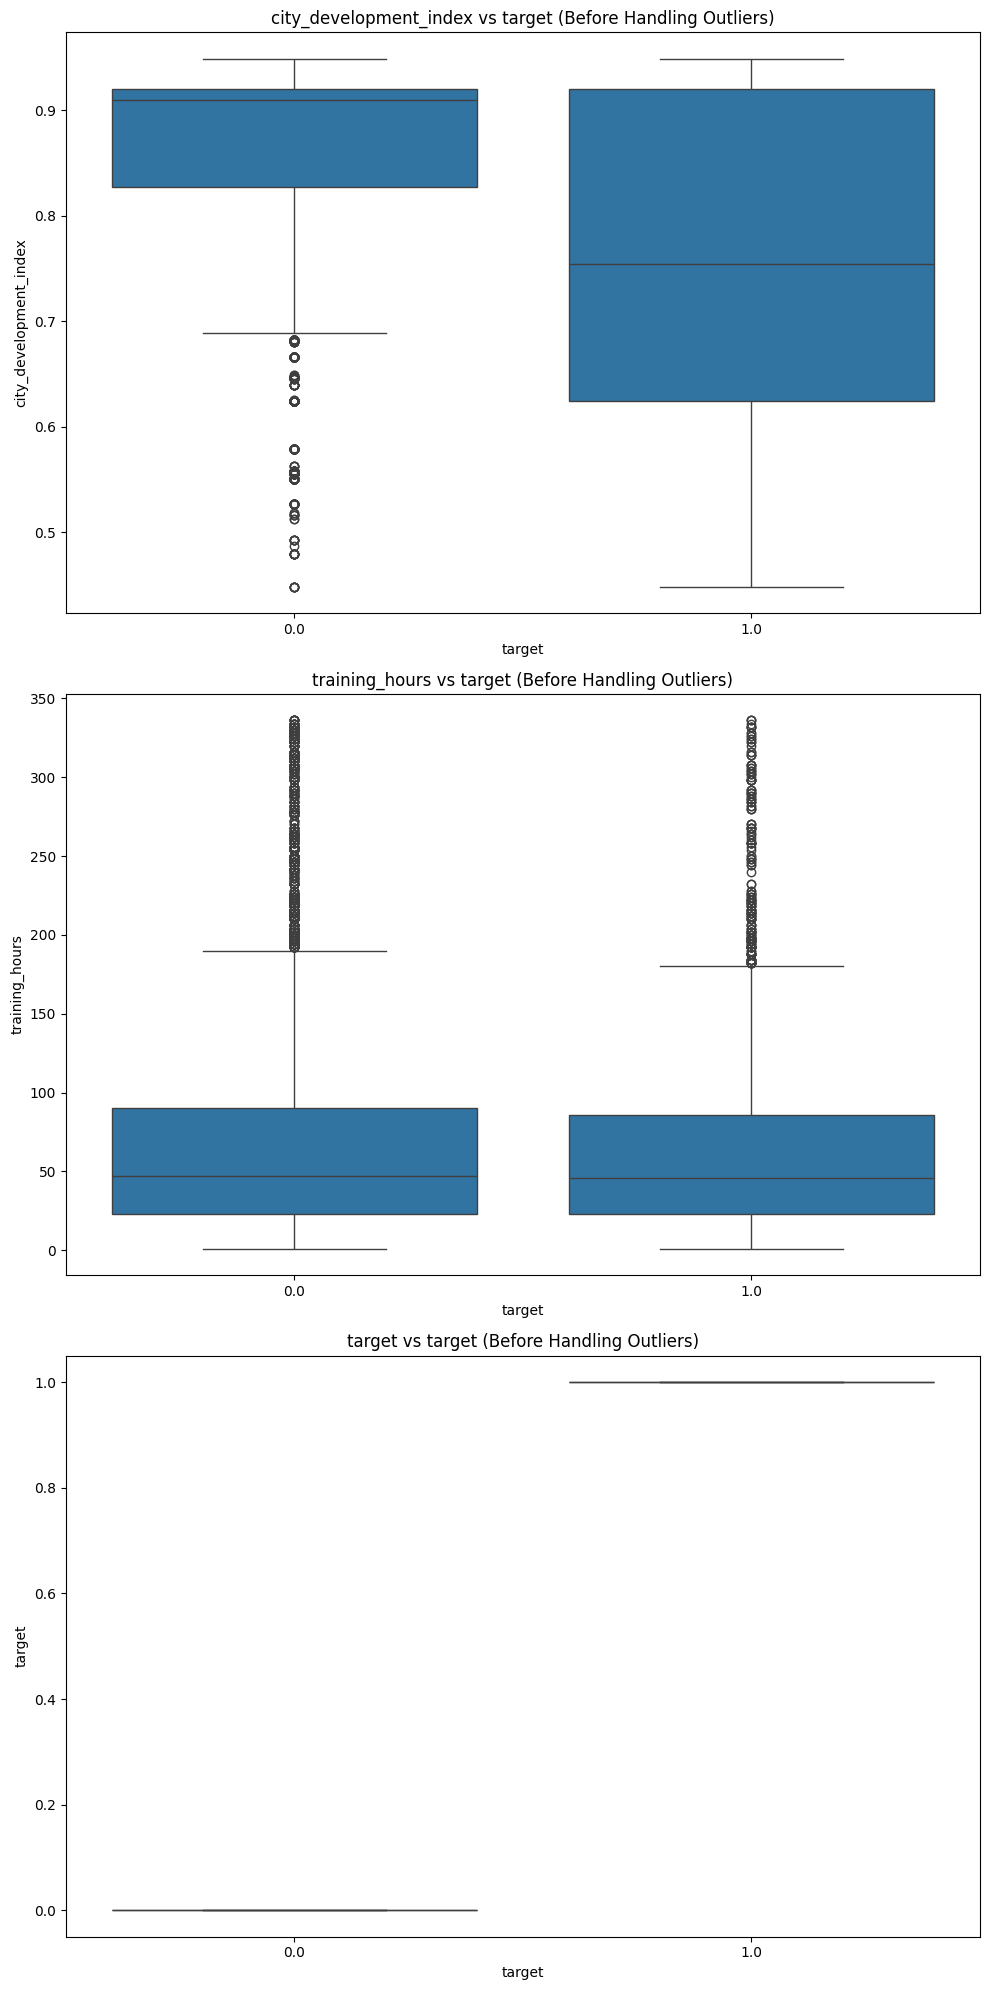

In [ ]:
fig, axes = plt.subplots(len(nums), 1, figsize=(10, 20))
for i, feature in enumerate(nums):
    sns.boxplot(x='target', y=feature, data=df, ax=axes[i])
    axes[i].set_title(f'{feature} vs target (Before Handling Outliers)')
plt.tight_layout()
plt.show()

Boxplot menampilkan distribusi data numerik dan memungkinkan identifikasi outlier sebagai titik-titik yang berada di luar "whiskers" dari boxplot. Ini memberikan pandangan awal tentang bagaimana distribusi fitur numerik terkait dengan variabel target y dan menunjukkan adanya outlier.

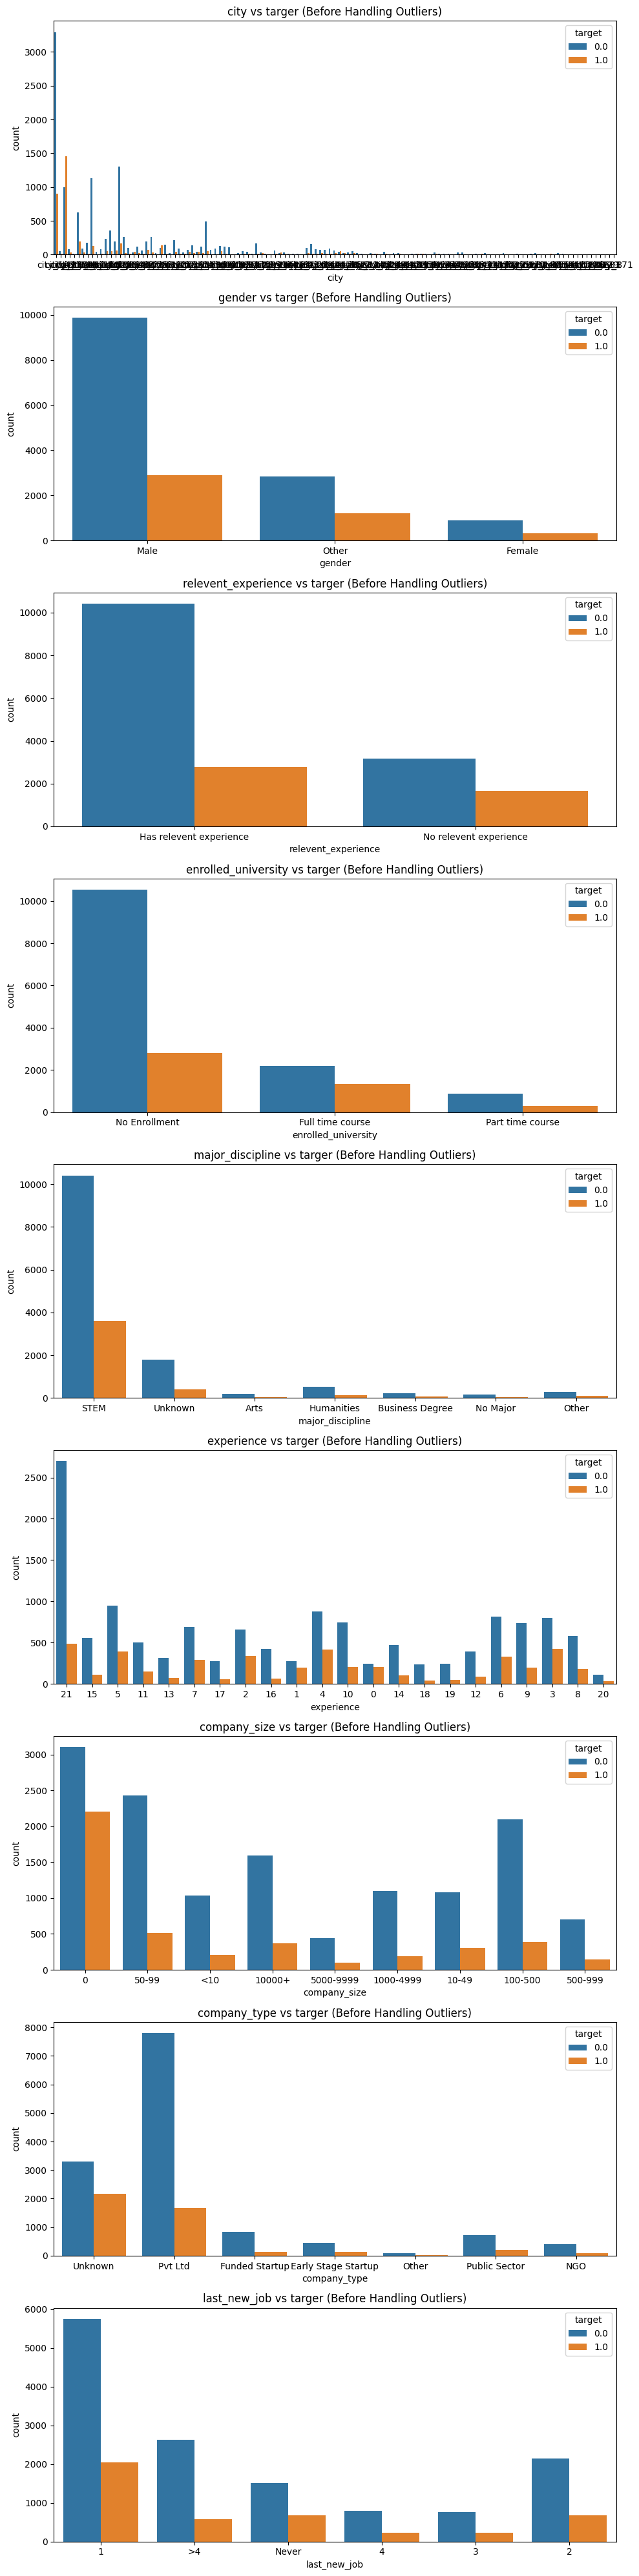

In [ ]:
fig, axes = plt.subplots(len(cats), 1, figsize=(10, 40))
for i, feature in enumerate(cats):
    sns.countplot(x=feature, hue='target', data=df, ax=axes[i])
    axes[i].set_title(f'{feature} vs targer (Before Handling Outliers)')
    axes[i].legend(title='target', loc='upper right')
plt.tight_layout()
plt.show()

Countplot menampilkan distribusi fitur kategorikal dengan menghitung jumlah kemunculan setiap kategori, dibagi berdasarkan variabel target . Ini membantu memahami bagaimana kategori dalam setiap fitur terkait dengan variabel target.

Handling outlier

city_development_index
Outlier sedikit dan berpotensi memiliki makna penting dalam kaitannya dengan target (kondisi kota dapat memengaruhi pencarian pekerjaan).
training_hours
Banyak outlier ekstrem (>200 jam) yang dapat mendistorsi distribusi dan memengaruhi model, terutama model sensitif terhadap skala data.

## Feature transformation


1. city_development_index Tidak perlu dilakukan transformasi feature
2. training_hours Perlu dilakukan transformasi log untuk membuat data ke arah distribusi normal


Feature : relevent_experience

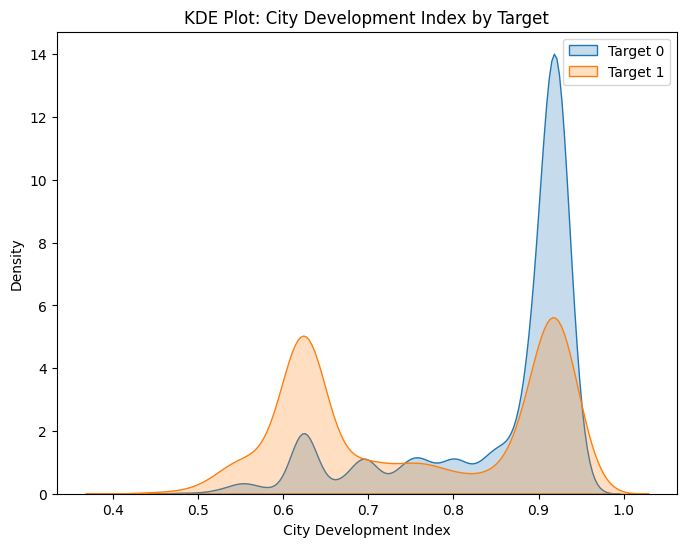

In [ ]:
# Distribusi target dan fitur dengan city_development_index
plt.figure(figsize=(8, 6))
sns.kdeplot(data=df[df['target'] == 0]['city_development_index'], label='Target 0', shade=True)
sns.kdeplot(data=df[df['target'] == 1]['city_development_index'], label='Target 1', shade=True)
plt.title('KDE Plot: City Development Index by Target')
plt.xlabel('City Development Index')
plt.ylabel('Density')
plt.legend()
plt.show()

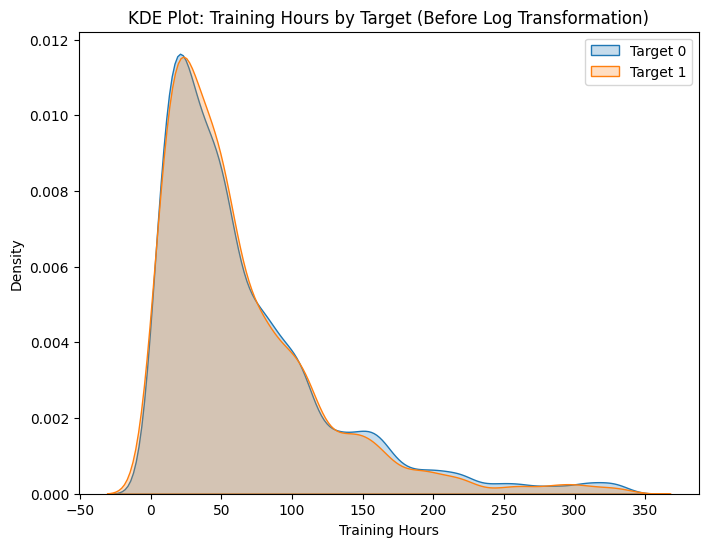

In [ ]:
# Distribusi Training Hours dengan Target Sebelum Transformasi log
plt.figure(figsize=(8, 6))
sns.kdeplot(data=df[df['target'] == 0]['training_hours'], label='Target 0', shade=True)
sns.kdeplot(data=df[df['target'] == 1]['training_hours'], label='Target 1', shade=True)
plt.title('KDE Plot: Training Hours by Target (Before Log Transformation)')
plt.xlabel('Training Hours')
plt.ylabel('Density')
plt.legend()
plt.show()


In [ ]:
# transformasi log
df['training_hours'] = np.log1p(df['training_hours'])

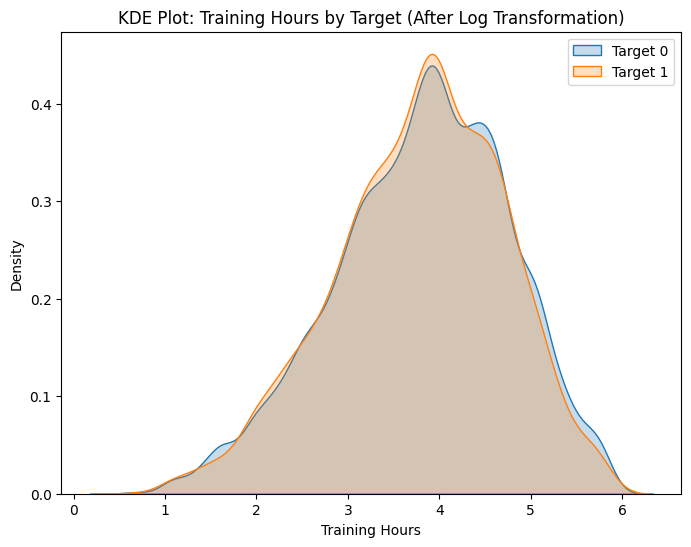

In [ ]:
# Distribusi Training Hours dengan Target Setelah Transformasi log
plt.figure(figsize=(8, 6))
sns.kdeplot(data=df[df['target'] == 0]['training_hours'], label='Target 0', shade=True)
sns.kdeplot(data=df[df['target'] == 1]['training_hours'], label='Target 1', shade=True)
plt.title('KDE Plot: Training Hours by Target (After Log Transformation)')
plt.xlabel('Training Hours')
plt.ylabel('Density')
plt.legend()
plt.show()

In [ ]:
from scipy.stats import zscore

# Menyimpan shape data sebelum penghapusan outlier
print("Sebelum Menghapus Outlier:", df.shape)

# Menghapus outlier berdasarkan z-score
df = df[(zscore(df['training_hours']) > -3) & (zscore(df['training_hours']) < 3)]

# Menyimpan shape data setelah penghapusan outlier
print("Setelah Menghapus Outlier:", df.shape)


Sebelum Menghapus Outlier: (18014, 14)
Setelah Menghapus Outlier: (18005, 14)


## Feature encoding

### ** 1. Label Encoding **


Label Encoding dilakukan pada :

1. feature categorical yang memiliki tipe data ordinal (dapat diurutkan)
2. feature yang hanya memiliki 2 categorical data

###Feature : relevent_experience

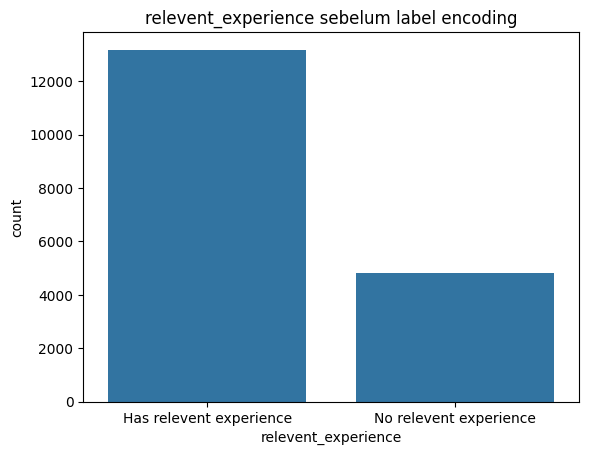

In [ ]:
# Sebelum Encoding
plt.title('relevent_experience sebelum label encoding')
sns.countplot(x="relevent_experience", data = df)
plt.xticks(rotation = 0)
plt.show()

In [ ]:
df["relevent_experience"] = [ 1 if i == "Has relevent experience"
                                    else 0 for i in df["relevent_experience"]]

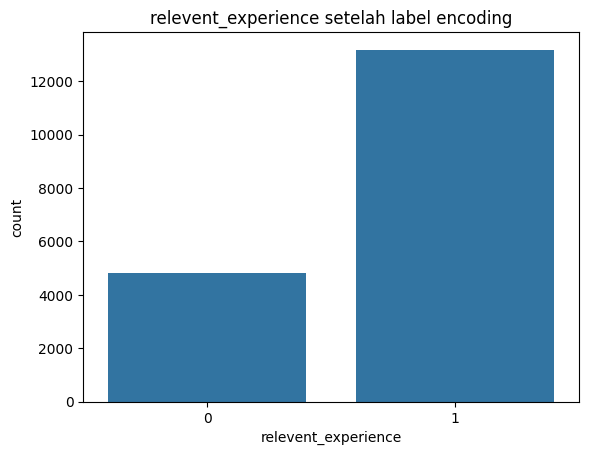

In [ ]:
# Setelah Encoding
plt.title('relevent_experience setelah label encoding')
sns.countplot(x="relevent_experience", data = df)
plt.xticks(rotation = 0)
plt.show()

###Feature : education_level

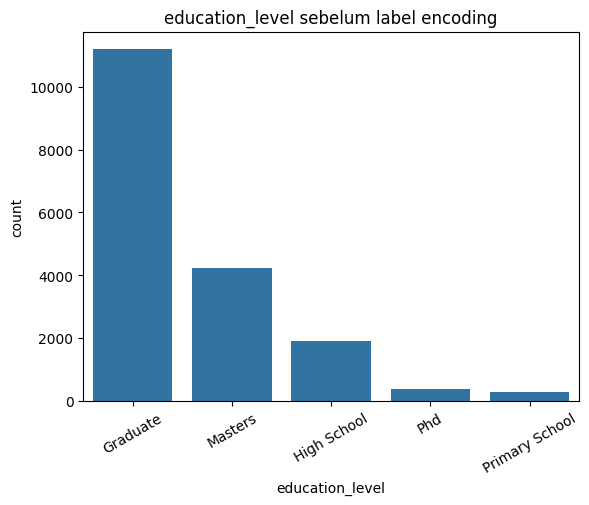

In [ ]:
# Sebelum Encoding
plt.title('education_level sebelum label encoding')
sns.countplot(x="education_level", data = df)
plt.xticks(rotation = 30)
plt.show()

In [ ]:
df["education_level"] = [ 5 if i == "Phd"
                                    else 4 if i == "Masters"
                                    else 3 if i == "Graduate"
                                    else 2 if i == "High School"
                                    else 1 for i in df["education_level"]]

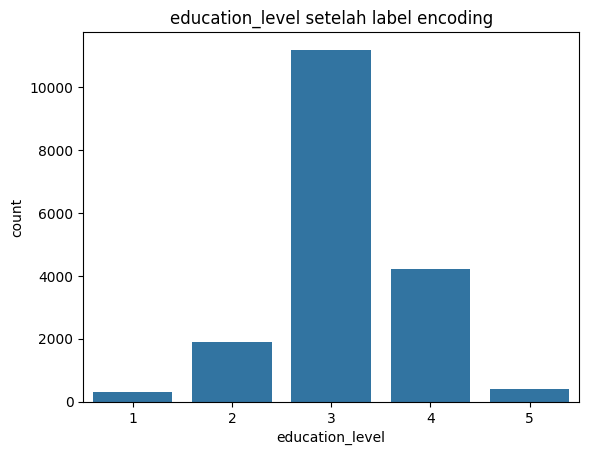

In [ ]:
# Setelah Encoding
plt.title('education_level setelah label encoding')
sns.countplot(x="education_level", data = df)
plt.xticks(rotation = 0)
plt.show()

###Feature last_new_job

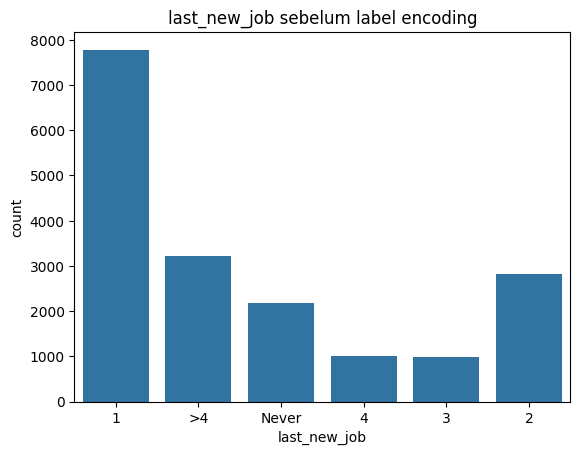

In [ ]:
# Sebelum encoding
plt.title('last_new_job sebelum label encoding')
sns.countplot(x="last_new_job", data = df)
plt.xticks(rotation = 0)
plt.show()

In [ ]:
df["last_new_job"] = [ 5 if i == ">4"
                               else 4 if i == "4"
                               else 3 if i == "3"
                               else 2 if i == "2"
                               else 1 if i == "1"
                               else 0 for i in df["last_new_job"]]

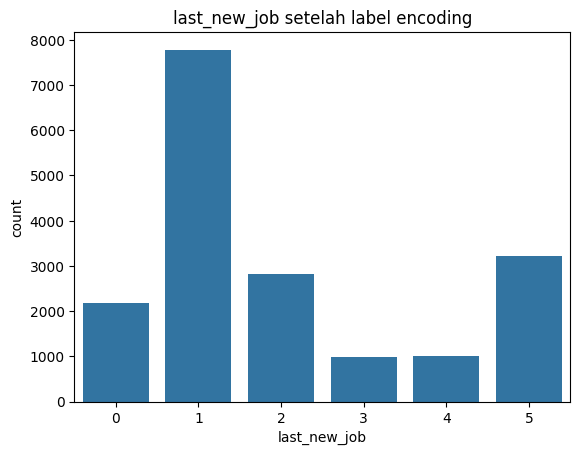

In [ ]:
# Setelah encoding
plt.title('last_new_job setelah label encoding')
sns.countplot(x="last_new_job", data = df)
plt.xticks(rotation = 0)
plt.show()

### ** 2. One Hot Encoding**

One-hot encoding dilakukan pada categorical data yang bukan tipe data ordinal(dapat diurutkan)

###Feature : gender


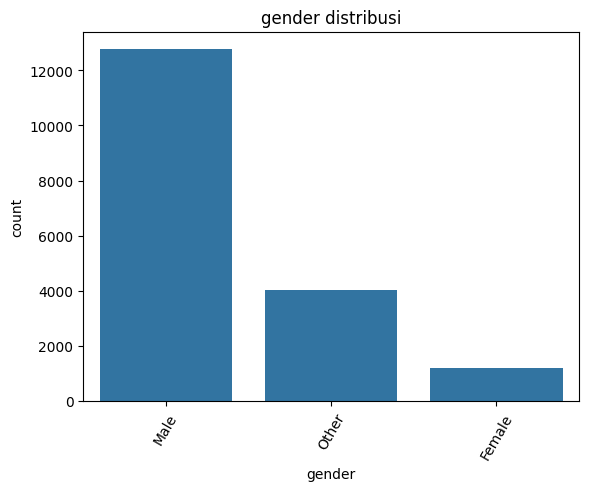

In [ ]:
plt.title('gender distribusi')
sns.countplot(x="gender", data = df)
plt.xticks(rotation = 60)
plt.show()

In [ ]:
df = pd.get_dummies(df, columns=['gender'], drop_first=False)

In [ ]:
df.T.tail(3).T

gender_Female gender_Male gender_Other
0             False        True        False
1             False        True        False
2             False       False         True
4             False        True        False
5             False       False         True
...             ...         ...          ...
19153         False        True        False
19154         False        True        False
19155         False        True        False
19156         False        True        False
19157         False       False         True

[18005 rows x 3 columns]

### Feature : enrolled_university

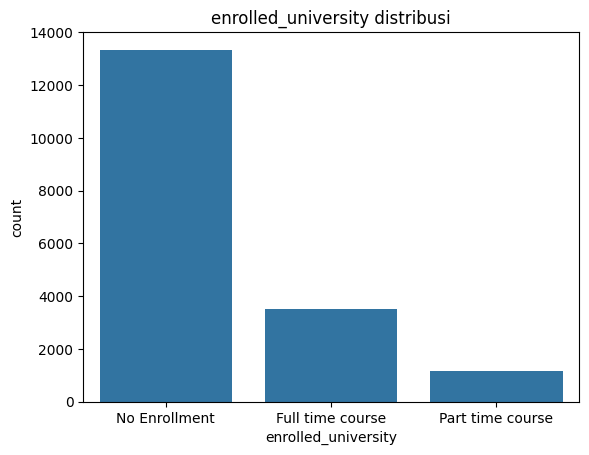

In [ ]:
# Distribution Check
plt.title('enrolled_university distribusi')
sns.countplot(x="enrolled_university", data = df)
plt.xticks(rotation = 0)
plt.show()


In [ ]:
df = pd.get_dummies(df, columns=['enrolled_university'], drop_first=False)

In [ ]:
# Feature setelah One-Hot Encoding
df.T.tail(3).T

enrolled_university_Full time course enrolled_university_No Enrollment  \
0                                    False                              True   
1                                    False                              True   
2                                     True                             False   
4                                    False                              True   
5                                    False                             False   
...                                    ...                               ...   
19153                                False                              True   
19154                                False                              True   
19155                                False                              True   
19156                                False                              True   
19157                                False                              True   

      enrolled_university_Part time course  
0                                    False  
1                                    False  
2                                    False  
4                                    False  
5                                     True  
...                                    ...  
19153                                False  
19154                                False  
19155                                False  
19156                                False  
19157                                False  

[18005 rows x 3 columns]

#### Feature : major_discipline

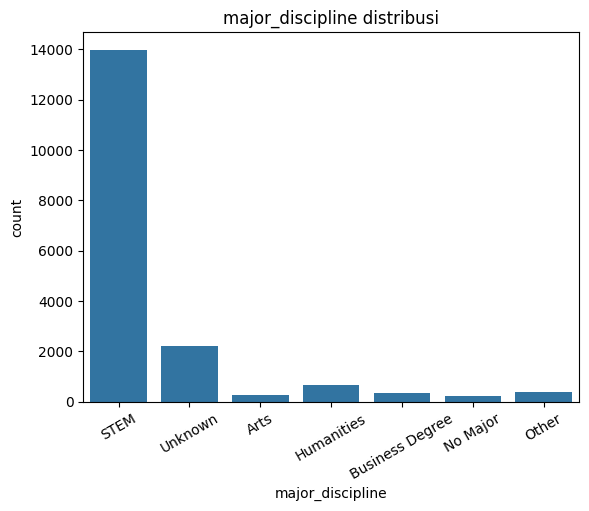

In [ ]:
# Cek distribusi
plt.title('major_discipline distribusi')
sns.countplot(x="major_discipline", data = df)
plt.xticks(rotation = 30)
plt.show()

In [ ]:

# One-hot Encoding
df = pd.get_dummies(df, columns=['major_discipline'], drop_first=False)

In [ ]:
# Feature setelah One-Hot Encoding
df.T.tail(7).T

major_discipline_Arts major_discipline_Business Degree  \
0                     False                            False   
1                     False                            False   
2                     False                            False   
4                     False                            False   
5                     False                            False   
...                     ...                              ...   
19153                 False                            False   
19154                 False                            False   
19155                 False                            False   
19156                 False                            False   
19157                 False                            False   

      major_discipline_Humanities major_discipline_No Major  \
0                           False                     False   
1                           False                     False   
2                           False                     False   
4                           False                     False   
5                           False                     False   
...                           ...                       ...   
19153                        True                     False   
19154                       False                     False   
19155                       False                     False   
19156                       False                     False   
19157                       False                     False   

      major_discipline_Other major_discipline_STEM major_discipline_Unknown  
0                      False                  True                    False  
1                      False                  True                    False  
2                      False                  True                    False  
4                      False                  True                    False  
5                      False                  True                    False  
...                      ...                   ...                      ...  
19153                  False                 False                    False  
19154                  False                  True                    False  
19155                  False                  True                    False  
19156                  False                 False                     True  
19157                  False                 False                     True  

[18005 rows x 7 columns]

#### Feature: company_size
dikarenakan 0 tidak cocok untuk mengisi missing value maka dibuat menjadi kategori baru 'unknown'. sehingga dibagi menjadi
- Small: <10, 10-49, 50-99
- Medium: 100-500, 500-999
- Large: 1000-4999, 5000-9999
- Unknown: Any undefined or missing values (e.g., '0')

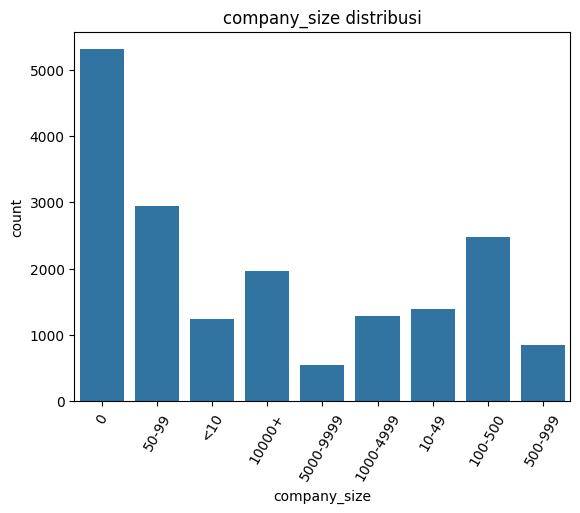

In [ ]:
# Sebelum Encoding
plt.title('company_size distribusi')
sns.countplot(x="company_size", data = df)
plt.xticks(rotation = 60)
plt.show()

In [ ]:
# buat kategori baru
df["company_size"] = df["company_size"].apply(
    lambda x: "Small" if x in ['<10', '10-49', '50-99'] else
              "Medium" if x in ['100-500', '500-999'] else
              "Large" if x in ['1000-4999', '5000-9999'] else
              "Unknown"  # For '0' or missing values
)

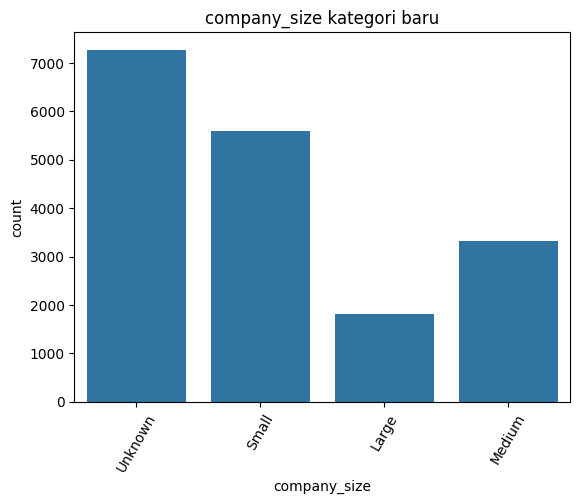

In [ ]:
# kategori baru
plt.title('company_size kategori baru')
sns.countplot(x="company_size", data = df)
plt.xticks(rotation = 60)
plt.show()

In [ ]:
# One-Hot Encoding
df = pd.get_dummies(df, columns=['company_size'], drop_first=False)

In [ ]:
# Feature setelah One-Hot Encoding
df.T.tail(4).T

company_size_Large company_size_Medium company_size_Small  \
0                  False               False              False   
1                  False               False               True   
2                  False               False              False   
4                  False               False               True   
5                  False               False              False   
...                  ...                 ...                ...   
19153              False               False              False   
19154              False               False              False   
19155              False               False               True   
19156              False                True              False   
19157              False               False              False   

      company_size_Unknown  
0                     True  
1                    False  
2                     True  
4                    False  
5                     True  
...                    ...  
19153                 True  
19154                 True  
19155                False  
19156                False  
19157                 True  

[18005 rows x 4 columns]

#### Feature: company_type

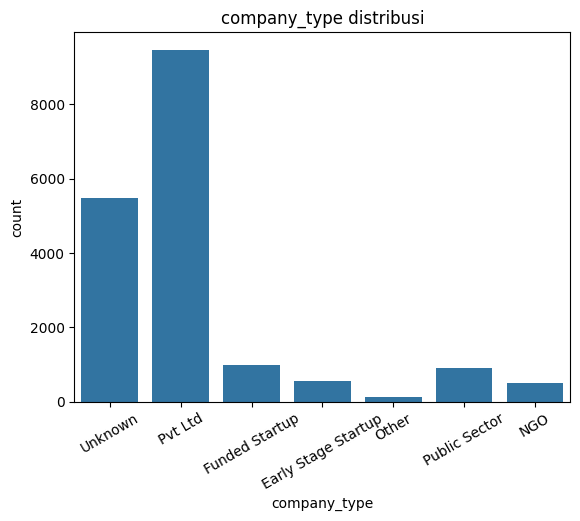

In [ ]:
# Sebelum Encoding
plt.title('company_type distribusi')
sns.countplot(x="company_type", data = df)
plt.xticks(rotation = 30)
plt.show()

In [ ]:
# One-Hot Encoding
df = pd.get_dummies(df, columns=['company_type'], drop_first=False)

In [ ]:
# Feature setelah One-Hot Encoding
df.T.tail(7).T

company_type_Early Stage Startup company_type_Funded Startup  \
0                                False                       False   
1                                False                       False   
2                                False                       False   
4                                False                        True   
5                                False                       False   
...                                ...                         ...   
19153                            False                       False   
19154                            False                       False   
19155                            False                       False   
19156                            False                       False   
19157                            False                       False   

      company_type_NGO company_type_Other company_type_Public Sector  \
0                False              False                      False   
1                False              False                      False   
2                False              False                      False   
4                False              False                      False   
5                False              False                      False   
...                ...                ...                        ...   
19153            False              False                      False   
19154            False              False                      False   
19155            False              False                      False   
19156            False              False                      False   
19157            False              False                      False   

      company_type_Pvt Ltd company_type_Unknown  
0                    False                 True  
1                     True                False  
2                    False                 True  
4                    False                False  
5                    False                 True  
...                    ...                  ...  
19153                False                 True  
19154                False                 True  
19155                 True                False  
19156                 True                False  
19157                False                 True  

[18005 rows x 7 columns]

In [ ]:
df.head()

enrollee_id      city  city_development_index  relevent_experience  \
0         8949  city_103                   0.920                    1   
1        29725   city_40                   0.776                    0   
2        11561   city_21                   0.624                    0   
4          666  city_162                   0.767                    1   
5        21651  city_176                   0.764                    1   

   education_level experience  last_new_job  training_hours  target  \
0                3         21             1        3.610918     1.0   
1                3         15             5        3.871201     0.0   
2                3          5             0        4.430817     0.0   
4                4         21             4        2.197225     0.0   
5                3         11             1        3.218876     1.0   

   gender_Female  ...  company_size_Medium  company_size_Small  \
0          False  ...                False               False   
1          False  ...                False                True   
2          False  ...                False               False   
4          False  ...                False                True   
5          False  ...                False               False   

   company_size_Unknown  company_type_Early Stage Startup  \
0                  True                             False   
1                 False                             False   
2                  True                             False   
4                 False                             False   
5                  True                             False   

   company_type_Funded Startup  company_type_NGO  company_type_Other  \
0                        False             False               False   
1                        False             False               False   
2                        False             False               False   
4                         True             False               False   
5                        False             False               False   

   company_type_Public Sector  company_type_Pvt Ltd  company_type_Unknown  
0                       False                 False                  True  
1                       False                  True                 False  
2                       False                 False                  True  
4                       False                 False                 False  
5                       False                 False                  True  

[5 rows x 33 columns]

## Handle class imbalance

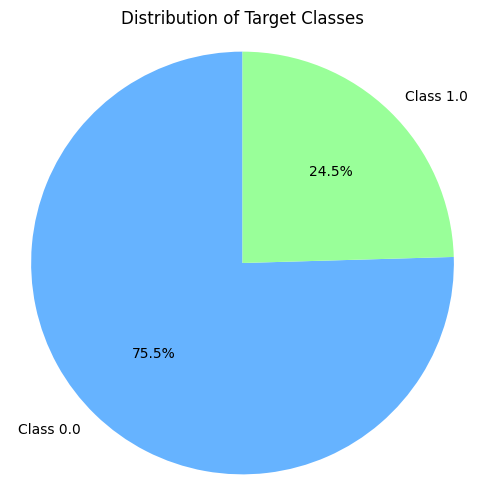

In [ ]:
counts = df['target'].value_counts()

# Membuat pie chart
plt.figure(figsize=(6, 6))
plt.pie(counts, labels=[f'Class {x}' for x in counts.index], autopct='%1.1f%%', startangle=90, colors=['#66b3ff', '#99ff99'])
plt.title('Distribution of Target Classes')
plt.axis('equal')  # Equal aspect ratio ensures that pie chart is drawn as a circle.
plt.show()

- 24.5 persen employee memilih mencari pekerjaan baru
- data imbalance ini akan dihandle saat sebelum modelling / menggunakan model yang robust terhadap imbalance data

##Feature Engineering

###a. Feature Selection


In [ ]:
# Cek deskripsi data
df.describe(include='all').T

count unique       top   freq  \
enrollee_id                           18005.0    NaN       NaN    NaN   
city                                    18005    123  city_103   4192   
city_development_index                18005.0    NaN       NaN    NaN   
relevent_experience                   18005.0    NaN       NaN    NaN   
education_level                       18005.0    NaN       NaN    NaN   
experience                              18005     22        21   3180   
last_new_job                          18005.0    NaN       NaN    NaN   
training_hours                        18005.0    NaN       NaN    NaN   
target                                18005.0    NaN       NaN    NaN   
gender_Female                           18005      2     False  16799   
gender_Male                             18005      2      True  12765   
gender_Other                            18005      2     False  13971   
enrolled_university_Full time course    18005      2     False  14491   
enrolled_university_No Enrollment       18005      2      True  13343   
enrolled_university_Part time course    18005      2     False  16857   
major_discipline_Arts                   18005      2     False  17757   
major_discipline_Business Degree        18005      2     False  17685   
major_discipline_Humanities             18005      2     False  17352   
major_discipline_No Major               18005      2     False  17793   
major_discipline_Other                  18005      2     False  17642   
major_discipline_STEM                   18005      2      True  13988   
major_discipline_Unknown                18005      2     False  15784   
company_size_Large                      18005      2     False  16183   
company_size_Medium                     18005      2     False  14677   
company_size_Small                      18005      2     False  12420   
company_size_Unknown                    18005      2     False  10735   
company_type_Early Stage Startup        18005      2     False  17443   
company_type_Funded Startup             18005      2     False  17031   
company_type_NGO                        18005      2     False  17506   
company_type_Other                      18005      2     False  17891   
company_type_Public Sector              18005      2     False  17093   
company_type_Pvt Ltd                    18005      2      True   9472   
company_type_Unknown                    18005      2     False  12533   

                                              mean          std       min  \
enrollee_id                           16903.531797  9665.633032       1.0   
city                                           NaN          NaN       NaN   
city_development_index                     0.83172     0.122128     0.448   
relevent_experience                       0.732186     0.442833       0.0   
education_level                           3.140739     0.688375       1.0   
experience                                     NaN          NaN       NaN   
last_new_job                              2.026993     1.673647       0.0   
training_hours                            3.801589     0.942107  1.098612   
target                                    0.245432     0.430355       0.0   
gender_Female                                  NaN          NaN       NaN   
gender_Male                                    NaN          NaN       NaN   
gender_Other                                   NaN          NaN       NaN   
enrolled_university_Full time course           NaN          NaN       NaN   
enrolled_university_No Enrollment              NaN          NaN       NaN   
enrolled_university_Part time course           NaN          NaN       NaN   
major_discipline_Arts                          NaN          NaN       NaN   
major_discipline_Business Degree               NaN          NaN       NaN   
major_discipline_Humanities                    NaN          NaN       NaN   
major_discipline_No Major                      NaN          NaN       NaN   
major_discipline_

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18005 entries, 0 to 19157
Data columns (total 33 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   enrollee_id                           18005 non-null  int64  
 1   city                                  18005 non-null  object 
 2   city_development_index                18005 non-null  float64
 3   relevent_experience                   18005 non-null  int64  
 4   education_level                       18005 non-null  int64  
 5   experience                            18005 non-null  object 
 6   last_new_job                          18005 non-null  int64  
 7   training_hours                        18005 non-null  float64
 8   target                                18005 non-null  float64
 9   gender_Female                         18005 non-null  bool   
 10  gender_Male                           18005 non-null  bool   
 11  gender_Other        

In [ ]:

df = df.drop(['enrollee_id', 'city'], axis=1)

In [ ]:
# Urutkan feature
columns_order =['city_development_index', 'relevent_experience', 'education_level',
       'experience', 'last_new_job', 'training_hours',
       'gender_Female', 'gender_Male', 'gender_Other',
       'enrolled_university_Full time course',
       'enrolled_university_No Enrollment',
       'enrolled_university_Part time course', 'major_discipline_Arts',
       'major_discipline_Business Degree', 'major_discipline_Humanities',
       'major_discipline_No Major', 'major_discipline_Other',
       'major_discipline_STEM', 'major_discipline_Unknown',
       'company_size_Large', 'company_size_Medium', 'company_size_Small',
       'company_size_Unknown', 'company_type_Early Stage Startup',
       'company_type_Funded Startup', 'company_type_NGO', 'company_type_Other',
       'company_type_Public Sector', 'company_type_Pvt Ltd',
       'company_type_Unknown','target']
df = df[columns_order]

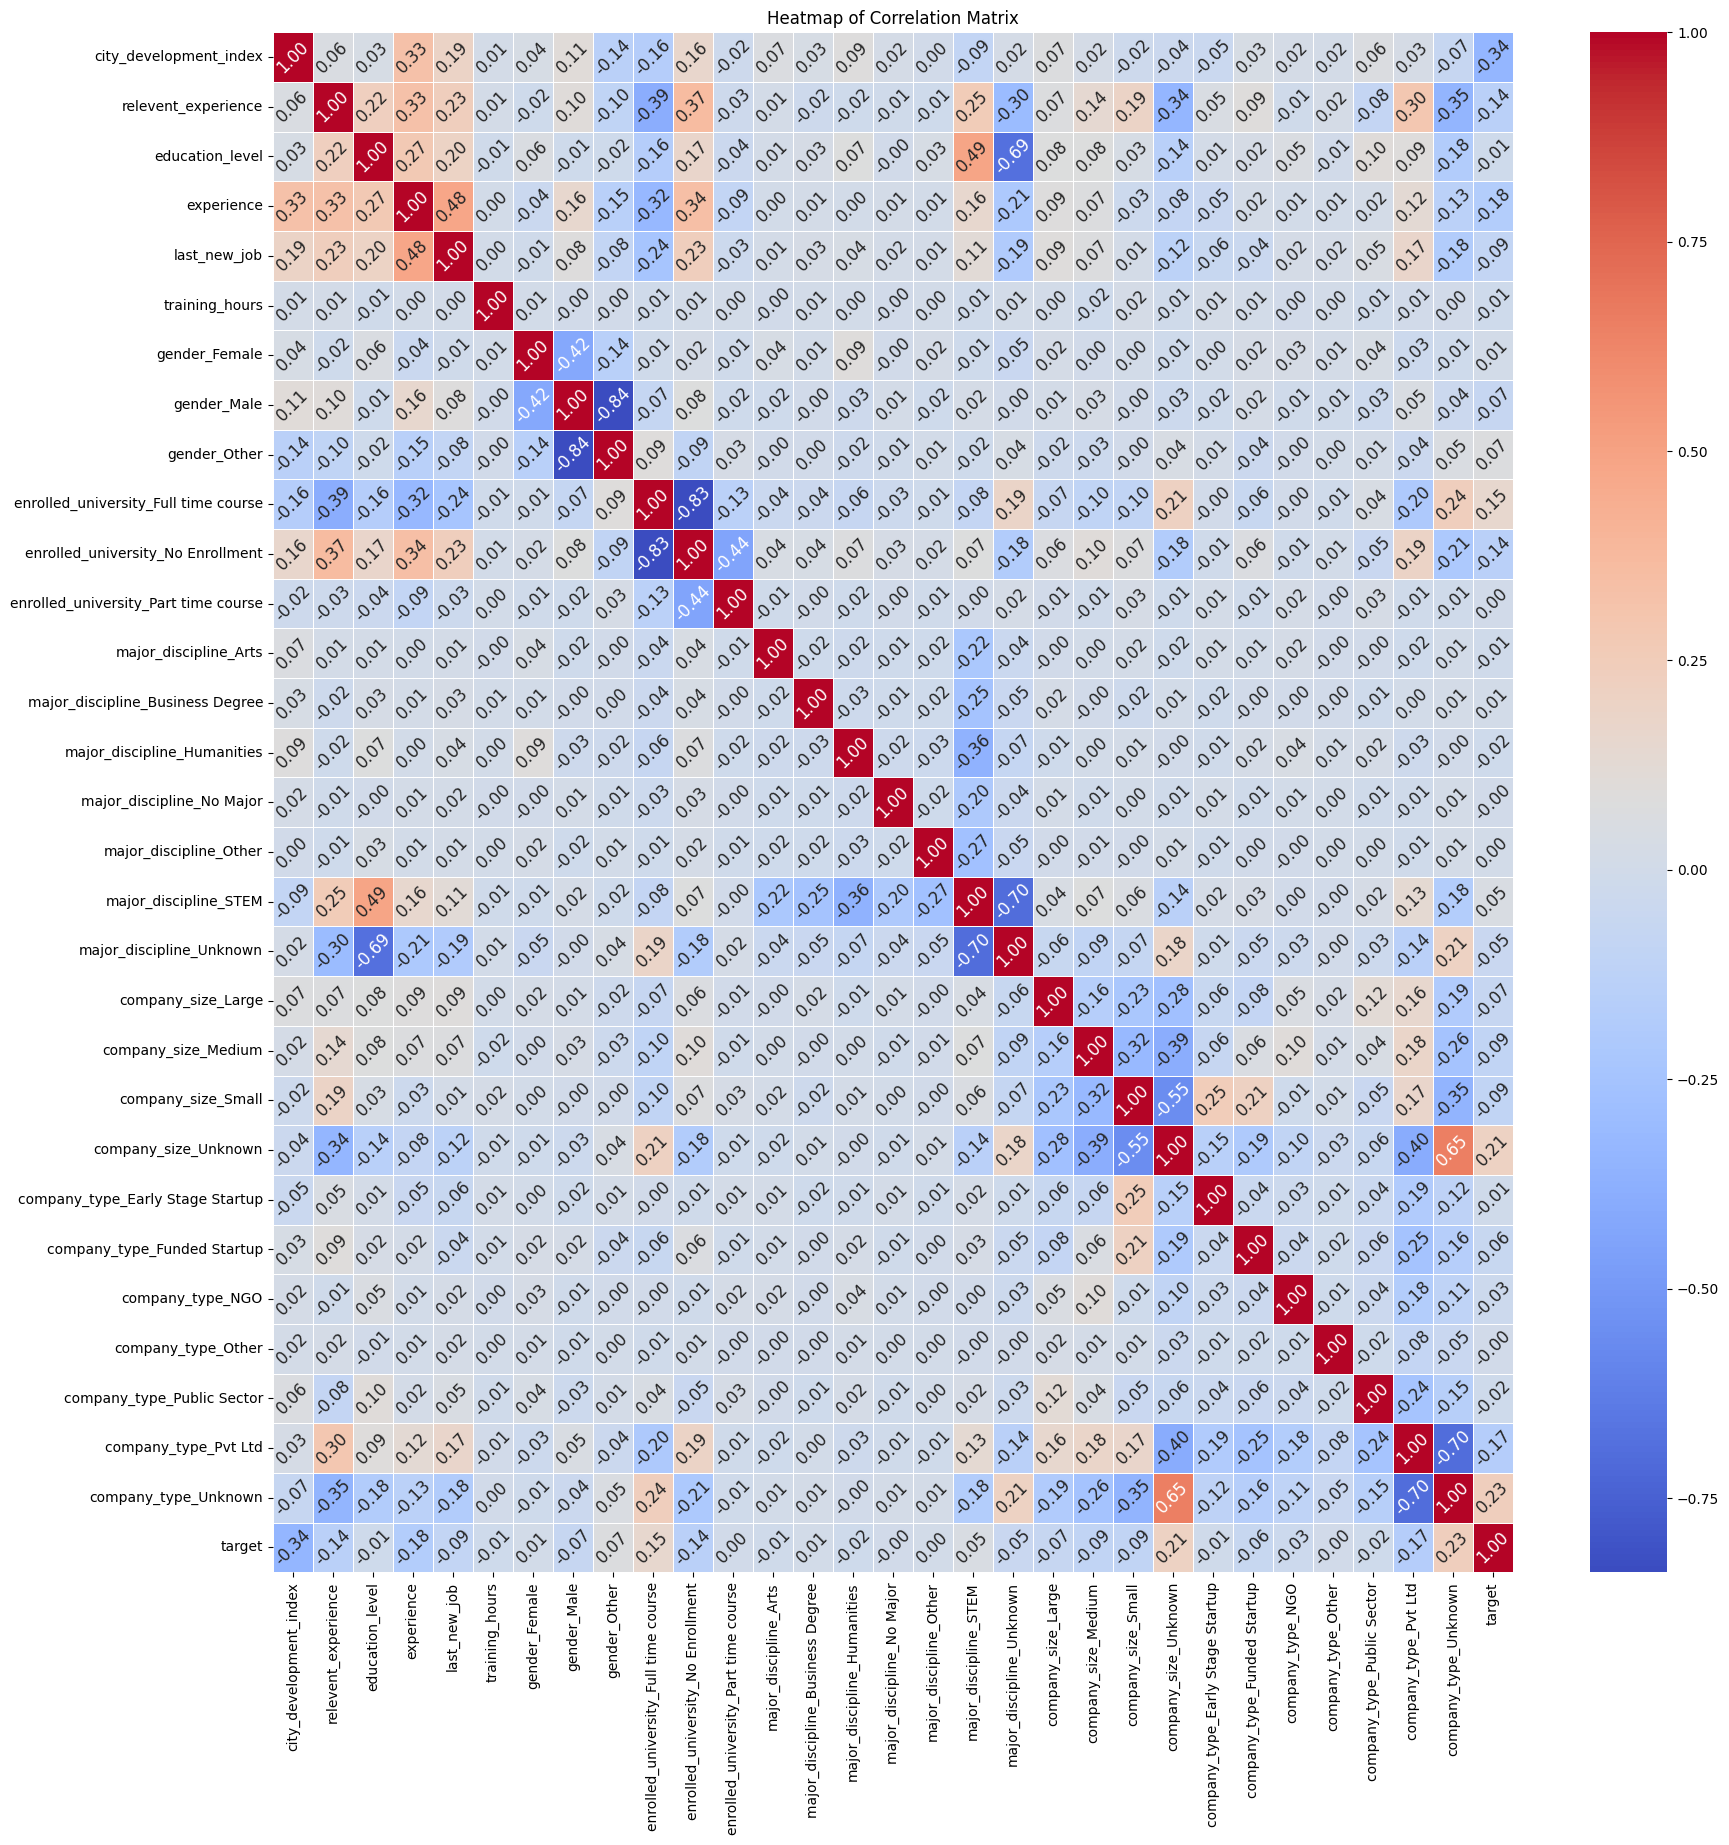

In [ ]:
# Membuat heatmap
plt.figure(figsize=(20, 20))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', linewidths=0.5, fmt='.2f', annot_kws={"size": 12, "rotation": 45})

# Menambahkan judul
plt.title('Heatmap of Correlation Matrix')

# Menampilkan plot
plt.show()

In [ ]:
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Get the absolute values of the correlation matrix to consider both positive and negative correlations
abs_correlation_matrix = correlation_matrix.abs()

# Get the highest correlation for each variable
highest_correlation = abs_correlation_matrix.apply(lambda x: x[x != 1].max())

# Create a DataFrame or table to display the highest correlation for each variable
highest_correlation_df = pd.DataFrame(highest_correlation, columns=['Highest Correlation'])
highest_correlation_df.index.name = 'Variable'
highest_correlation_df.reset_index(inplace=True)

# Sort the DataFrame by highest correlation values in descending order
highest_correlation_df_sorted = highest_correlation_df.sort_values(by='Highest Correlation', ascending=False)

highest_correlation_df_sorted

Variable  Highest Correlation
7                            gender_Male             0.838685
8                           gender_Other             0.838685
9   enrolled_university_Full time course             0.833091
10     enrolled_university_No Enrollment             0.833091
17                 major_discipline_STEM             0.699991
18              major_discipline_Unknown             0.699991
29                  company_type_Unknown             0.696170
28                  company_type_Pvt Ltd             0.696170
2                        education_level             0.686170
22                  company_size_Unknown             0.650593
21                    company_size_Small             0.551845
4                           last_new_job             0.475736
3                             experience             0.475736
11  enrolled_university_Part time course             0.441491
6                          gender_Female             0.418193
20                   company_size_Medium             0.391867
1                    relevent_experience             0.388901
14           major_discipline_Humanities             0.362000
0                 city_development_index             0.336511
30                                target             0.336511
19                    company_size_Large             0.276128
16                major_discipline_Other             0.267674
24           company_type_Funded Startup             0.251959
13      major_discipline_Business Degree             0.251015
23      company_type_Early Stage Startup             0.247651
27            company_type_Public Sector             0.243365
12                 major_discipline_Arts             0.220530
15             major_discipline_No Major             0.203690
25                      company_type_NGO             0.177880
26                    company_type_Other             0.084102
5                         training_hours             0.020620

**Here** are commonly accepted interpretations for Pearson correlation values:

| Correlation Strength            | Absolute Value of r |
|---------------------------------|----------------------|
| **Strong correlation**          | r ≥ 0.7             |
| **Moderate correlation**        | 0.5 ≤ r < 0.7       |
| **Weak correlation**            | 0.3 ≤ r < 0.5       |
| **Very weak or no correlation** | r < 0.3             |

- Terdapat multikolinearitas kuat antara beberapa feature. Direkomendasikan untuk menggunakan model yang robust terhadap multikolinearitas

In [ ]:
df

Variable  city_development_index  relevent_experience  education_level  \
0                          0.920                    1                3   
1                          0.776                    0                3   
2                          0.624                    0                3   
4                          0.767                    1                4   
5                          0.764                    1                3   
...                          ...                  ...              ...   
19153                      0.878                    0                3   
19154                      0.920                    1                3   
19155                      0.920                    1                3   
19156                      0.802                    1                2   
19157                      0.855                    0                1   

Variable experience  last_new_job  training_hours  gender_Female  gender_Male  \
0                21             1        3.610918          False         True   
1                15             5        3.871201          False         True   
2                 5             0        4.430817          False        False   
4                21             4        2.197225          False         True   
5                11             1        3.218876          False        False   
...             ...           ...             ...            ...          ...   
19153            14             1        3.761200          False         True   
19154            14             4        3.970292          False         True   
19155            21             4        3.806662          False         True   
19156             0             2        4.584967          False         True   
19157             2             1        4.852030          False        False   

Variable  gender_Other  enrolled_university_Full time course  ...  \
0                False                                 False  ...   
1                False                                 False  ...   
2                 True                                  True  ...   
4                False                                 False  ...   
5                 True                                 False  ...   
...                ...                                   ...  ...   
19153            False                                 False  ...   
19154            False                                 False  ...   
19155            False                                 False  ...   
19156            False                                 False  ...   
19157             True                                 False  ...   

Variable  company_size_Small  company_size_Unknown  \
0                      False                  True   
1                       True                 False   
2                      False                  True   
4                       True                 False   
5                      False                  True   
...                      ...                   ...   
19153                  False                  True   
19154                  False                  True   
19155                   True                 False   
19156                  False                 False   
19157                  False                  True   

Variable  company_type_Early Stage Startup  company_type_Funded Startup  \
0                                    False                        False   
1                                    False                        False   
2                                    False                        False   
4                                    False                         True   
5                                    False                        False   
...                                    ...                          ...   
19153                                False                        False   
19154                                False                  

In [ ]:
from scipy.stats import chi2_contingency

def run_chi_square_tests(df, significance_level=0.05):
    # Identify categorical columns
    cat_columns = df.columns

    # Store results
    results = []

    # Iterate through all pairs of categorical columns
    for i in range(len(cat_columns)):
        for j in range(i+1, len(cat_columns)):
            col1, col2 = cat_columns[i], cat_columns[j]

            # Create contingency table
            contingency_table = pd.crosstab(df[col1], df[col2])

            # Perform chi-square test
            chi2, p_value, dof, expected = chi2_contingency(contingency_table)

            # Check significance
            is_significant = p_value < significance_level

            # Store results
            results.append({
                'Column 1': col1,
                'Column 2': col2,
                'Chi-square': chi2,
                'p-value': p_value,
                'DoF': dof,
                'Significant': is_significant
            })

    # Convert results to DataFrame
    results_df = pd.DataFrame(results)
    return results_df




In [ ]:
# Run chi-square tests
results = run_chi_square_tests(df)

In [ ]:
results[(results['Significant'] == False) & (results['Column 2'] == 'target')]

Column 1 Column 2  Chi-square   p-value  DoF  \
164                        training_hours   target  248.456383  0.323710  239   
188                         gender_Female   target    1.307935  0.252769    1   
293  enrolled_university_Part time course   target    0.000000  1.000000    1   
311                 major_discipline_Arts   target    1.545580  0.213789    1   
328      major_discipline_Business Degree   target    0.422951  0.515468    1   
359             major_discipline_No Major   target    0.000000  1.000000    1   
373                major_discipline_Other   target    0.030107  0.862248    1   
443      company_type_Early Stage Startup   target    1.789501  0.180987    1   
458                    company_type_Other   target    0.010947  0.916670    1   

     Significant  
164        False  
188        False  
293        False  
311        False  
328        False  
359        False  
373        False  
443        False  
458        False

Terdapat beberapa feature yang tidak significant terhadap target, pada saat dilakuakn chi-square, bisa dijadikan pertimbangan untuk di drop apabila model tidak bagus kedepannya, untuk sekarang tidak di drop dulu.

In [ ]:
# from sklearn.feature_selection import SelectKBest
# from sklearn.feature_selection import chi2
# import pandas as pd

# # Misalkan df adalah DataFrame dengan kolom fitur dan target
# X = df.drop('target', axis=1)  # Fitur
# y = df['target']  # Target

# # Pilih fitur menggunakan Chi-Square
# chi2_selector = SelectKBest(chi2, k='all')  # 'all' untuk memilih semua fitur yang signifikan
# X_new = chi2_selector.fit_transform(X, y)

# # Tampilkan fitur yang terpilih
# selected_features = X.columns[chi2_selector.get_support()]
# print(selected_features)



### b. Feature Extraction
Untuk Sekarang Fitur yang digunakan berasal dari label encoding dan one-hot encoding dan beberapa fitur numerik

### c. Feature Tambahan
Untuk Sementara tidak ada Fitur Tambahan

In [ ]:
# Hasil data Preprocessing yang siap di modelling
df.head()

Variable  city_development_index  relevent_experience  education_level  \
0                          0.920                    1                3   
1                          0.776                    0                3   
2                          0.624                    0                3   
4                          0.767                    1                4   
5                          0.764                    1                3   

Variable experience  last_new_job  training_hours  gender_Female  gender_Male  \
0                21             1        3.610918          False         True   
1                15             5        3.871201          False         True   
2                 5             0        4.430817          False        False   
4                21             4        2.197225          False         True   
5                11             1        3.218876          False        False   

Variable  gender_Other  enrolled_university_Full time course  ...  \
0                False                                 False  ...   
1                False                                 False  ...   
2                 True                                  True  ...   
4                False                                 False  ...   
5                 True                                 False  ...   

Variable  company_size_Small  company_size_Unknown  \
0                      False                  True   
1                       True                 False   
2                      False                  True   
4                       True                 False   
5                      False                  True   

Variable  company_type_Early Stage Startup  company_type_Funded Startup  \
0                                    False                        False   
1                                    False                        False   
2                                    False                        False   
4                                    False                         True   
5                                    False                        False   

Variable  company_type_NGO  company_type_Other  company_type_Public Sector  \
0                    False               False                       False   
1                    False               False                       False   
2                    False               False                       False   
4                    False               False                       False   
5                    False               False                       False   

Variable  company_type_Pvt Ltd  company_type_Unknown  target  
0                        False                  True     1.0  
1                         True                 False     0.0  
2                        False                  True     0.0  
4                        False                 False     0.0  
5                        False                  True     1.0  

[5 rows x 31 columns]

In [ ]:
from google.colab import files
# # Simpan DataFrame ke file CSV
df.to_csv('data_preprocessing.csv', index=False)

files.download('data_preprocessing.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Stage 3 - Modeling

In [ ]:
!pip install catboost

In [ ]:
import numpy as np
import pandas as pd
import plotly as py
import plotly.graph_objs as go
import plotly.express as px
from plotly.offline import init_notebook_mode
init_notebook_mode(connected = True)
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from sklearn.metrics import roc_auc_score, precision_score, recall_score, f1_score

from sklearn.model_selection import train_test_split, cross_val_score

from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

pd.set_option('display.max_columns', None)

In [ ]:
X = df.drop(['target'], axis = 1)
y = df['target']

num_cols = X.select_dtypes(include = ['int64', 'float64']).columns.to_list()
cat_cols = X.select_dtypes(include = ['object']).columns.to_list()

def label_encoder(df):
    for i in cat_cols:
        le = LabelEncoder()
        df[i] = le.fit_transform(df[i])
    return df

sc = StandardScaler()
X[num_cols] = sc.fit_transform(X[num_cols])

X = label_encoder(X)

X.head()


Variable  city_development_index  relevent_experience  education_level  \
0                       0.722868             0.604793        -0.204456   
1                      -0.456254            -1.653459        -0.204456   
2                      -1.700883            -1.653459        -0.204456   
4                      -0.529949             0.604793         1.248281   
5                      -0.554514             0.604793        -0.204456   

Variable  experience  last_new_job  training_hours  gender_Female  \
0                 14     -0.613643       -0.202394          False   
1                  7      1.776414        0.073891          False   
2                 17     -1.211157        0.667912          False   
4                 14      1.178900       -1.703001          False   
5                  3     -0.613643       -0.618539          False   

Variable  gender_Male  gender_Other  enrolled_university_Full time course  \
0                True         False                                 False   
1                True         False                                 False   
2               False          True                                  True   
4                True         False                                 False   
5               False          True                                 False   

Variable  enrolled_university_No Enrollment  \
0                                      True   
1                                      True   
2                                     False   
4                                      True   
5                                     False   

Variable  enrolled_university_Part time course  major_discipline_Arts  \
0                                        False                  False   
1                                        False                  False   
2                                        False                  False   
4                                        False                  False   
5                                         True                  False   

Variable  major_discipline_Business Degree  major_discipline_Humanities  \
0                                    False                        False   
1                                    False                        False   
2                                    False                        False   
4                                    False                        False   
5                                    False                        False   

Variable  major_discipline_No Major  major_discipline_Other  \
0                             False                   False   
1                             False                   False   
2                             False                   False   
4                             False                   False   
5                             False                   False   

Variable  major_discipline_STEM  major_discipline_Unknown  company_size_Large  \
0                          True                     False               False   
1                          True                     False               False   
2                          True                     False               False   
4                          True                     False               False   
5                          True                     False               False   

Variable  company_size_Medium  company_size_Small  company_size_Unknown  \
0                       False               False                  True   
1                       False                True                 False   
2                       False               False                  True   
4                       False                True                 False   
5                       False               False                  True   

Variable  company_type_Early Stage Startup  company_type_Funded Startup  \
0                                    False                        False   
1                                    

In [ ]:
df['target'].value_counts()

target
0.0    13586
1.0     4419
Name: count, dtype: int64

In [ ]:
from imblearn.over_sampling import SMOTE

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 2021)

smote = SMOTE()

X_train_balanced, Y_train_balanced = smote.fit_resample(X_train, y_train)

Y_train_balanced.value_counts()

target
0.0    10864
1.0    10864
Name: count, dtype: int64

In [ ]:
results = pd.DataFrame(columns = ['LR', 'RF', 'XGB', 'LGBM', 'CB'], index = range(4))

##Model


###LGBMClassifier 80%

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 10864, number of negative: 10864
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006252 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1103
[LightGBM] [Info] Number of data points in the train set: 21728, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
Best Hyperparameters: {'subsample': 0.8, 'reg_lambda': 1, 'reg_alpha': 1, 'num_leaves': 50, 'n_estimators': 100, 'min_child_samples': 20, 'max_depth': 10, 'learning_rate': 0.05, 'colsample_bytree': 0.8}
Best Cross-Validation Accuracy: 0.8402
              precision    recall  f1-score   support

         0.0       0.89      0.84      0.86      2722
      

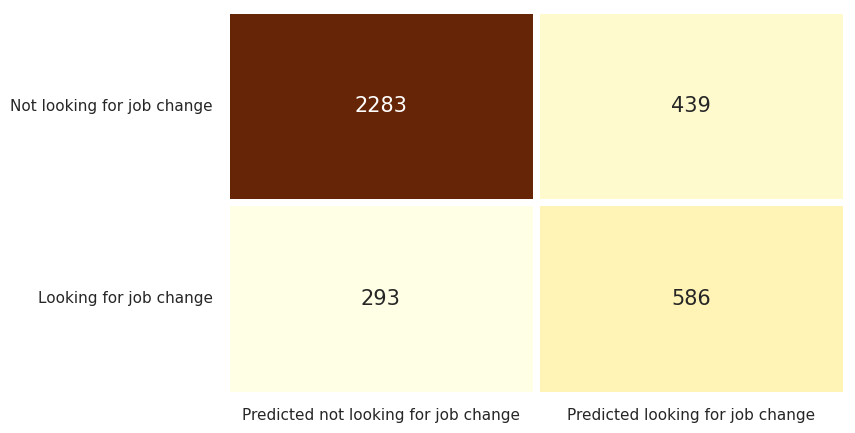

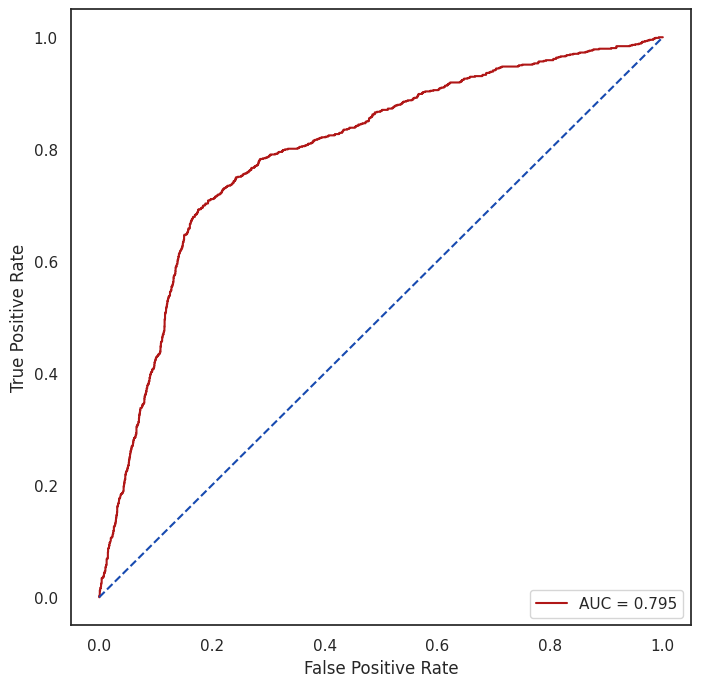

In [ ]:
from lightgbm import LGBMClassifier
from sklearn.model_selection import RandomizedSearchCV, cross_val_score
from sklearn.metrics import classification_report, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, roc_curve, auc
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Menentukan parameter untuk RandomizedSearchCV
param_dist = {
    'num_leaves': [31, 50, 100],  # Jumlah daun dalam pohon
    'learning_rate': [0.01, 0.05, 0.1, 0.2],  # Laju pembelajaran
    'n_estimators': [50, 100, 200, 500],  # Jumlah estimasi (pohon)
    'max_depth': [-1, 3, 5, 10],  # Kedalaman maksimum pohon
    'min_child_samples': [10, 20, 30],  # Jumlah minimal sampel pada node
    'subsample': [0.6, 0.7, 0.8, 1.0],  # Proporsi sampel yang digunakan
    'colsample_bytree': [0.6, 0.7, 0.8, 1.0],  # Proporsi kolom yang digunakan
    'reg_alpha': [0, 0.1, 0.5, 1],  # Regularisasi L1
    'reg_lambda': [0, 0.1, 0.5, 1],  # Regularisasi L2
}

# Membuat model LGBMClassifier
lgbm = LGBMClassifier(random_state=2021)

# Menggunakan RandomizedSearchCV untuk mencari hyperparameter terbaik
random_search = RandomizedSearchCV(
    lgbm,
    param_distributions=param_dist,
    n_iter=5,  # Banyaknya kombinasi yang dicoba
    scoring='accuracy',  # Skor akurasi
    cv=5,  # 5-fold cross-validation
    verbose=1,  # Menampilkan progress
    random_state=2021,
    n_jobs=-1  # Gunakan semua CPU yang tersedia
)

# Melatih model menggunakan data training (X_train_balanced dan Y_train_balanced adalah data latih Anda)
random_search.fit(X_train_balanced, Y_train_balanced)

# Menampilkan hyperparameter terbaik dan akurasi
print(f"Best Hyperparameters: {random_search.best_params_}")
print(f"Best Cross-Validation Accuracy: {random_search.best_score_:.4f}")

# Menggunakan model dengan hyperparameter terbaik untuk prediksi
lgbm_best = random_search.best_estimator_
y_pred = lgbm_best.predict(X_test)
y_prob = lgbm_best.predict_proba(X_test)[:, 1]

# Menyimpan hasil evaluasi ke dalam tabel
results.iloc[0, 3] = round(precision_score(y_test, y_pred), 2)
results.iloc[1, 3] = round(recall_score(y_test, y_pred), 2)
results.iloc[2, 3] = round(f1_score(y_test, y_pred), 2)
results.iloc[3, 3] = round(roc_auc_score(y_test, y_prob), 3)

# Menampilkan classification report dan ROC AUC score
print(classification_report(y_test, y_pred))
print(f'ROC AUC score: {round(roc_auc_score(y_test, y_prob), 3)}')

# Cross-validation scores
print('-----------------------------------------------------')
print('Cross-validation scores with 5 folds:')
print(f"Accuracy: {round(cross_val_score(lgbm_best, X_train_balanced, Y_train_balanced, cv=5, scoring='accuracy').mean(), 3)}")
print(f"ROC AUC: {round(cross_val_score(lgbm_best, X_train_balanced, Y_train_balanced, cv=5, scoring='roc_auc').mean(), 3)}")
print(f"Precision: {round(cross_val_score(lgbm_best, X_train_balanced, Y_train_balanced, cv=5, scoring='precision').mean(), 2)}")
print(f"Recall: {round(cross_val_score(lgbm_best, X_train_balanced, Y_train_balanced, cv=5, scoring='recall').mean(), 2)}")
print(f"F1: {round(cross_val_score(lgbm_best, X_train_balanced, Y_train_balanced, cv=5, scoring='f1').mean(), 2)}")

# Visualize confusion matrix
lgbm_cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 5))
sns.heatmap(lgbm_cm, cmap='YlOrBr', annot=True, fmt='d', linewidths=5, cbar=False, annot_kws={'fontsize': 15},
            yticklabels=['Not looking for job change', 'Looking for job change'], xticklabels=['Predicted not looking for job change', 'Predicted looking for job change'])
plt.yticks(rotation=0)
plt.show()

# ROC curve
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(false_positive_rate, true_positive_rate)

sns.set_theme(style='white')
plt.figure(figsize=(8, 8))
plt.plot(false_positive_rate, true_positive_rate, color='#b01717', label='AUC = %0.3f' % roc_auc)
plt.legend(loc='lower right')
plt.plot([0, 1], [0, 1], linestyle='--', color='#174ab0')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# Feature importance
f_imp4 = pd.DataFrame(columns=['feature', 'importance'], index=range(X_train_balanced.shape[1]))  # Menggunakan jumlah fitur pada X_train_balanced
for i in range(len(f_imp4.index)):
    f_imp4.iloc[i, 0] = X_train_balanced.columns.to_list()[i]
f_imp4['importance'] = lgbm_best.feature_importances_
f_imp4 = f_imp4.sort_values('importance', ascending=False)
f_imp4[0:11].style.background_gradient(cmap='YlOrBr')


###xgboost 77%

              precision    recall  f1-score   support

         0.0       0.90      0.78      0.84      2722
         1.0       0.52      0.72      0.60       879

    accuracy                           0.77      3601
   macro avg       0.71      0.75      0.72      3601
weighted avg       0.81      0.77      0.78      3601

ROC AUC score: 0.783


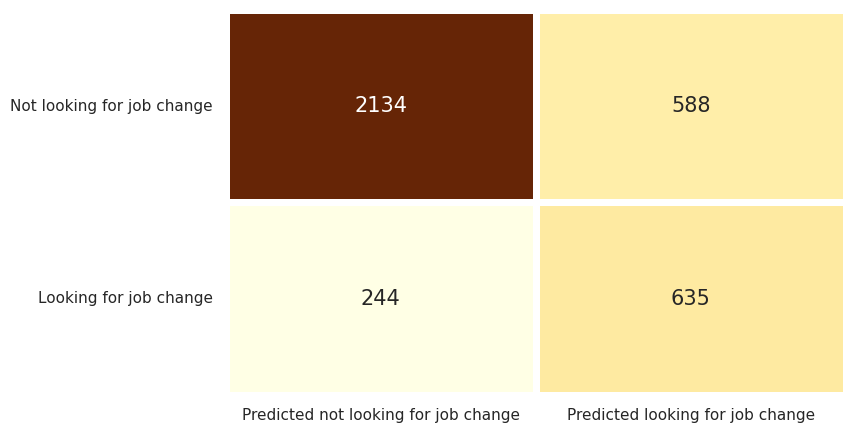

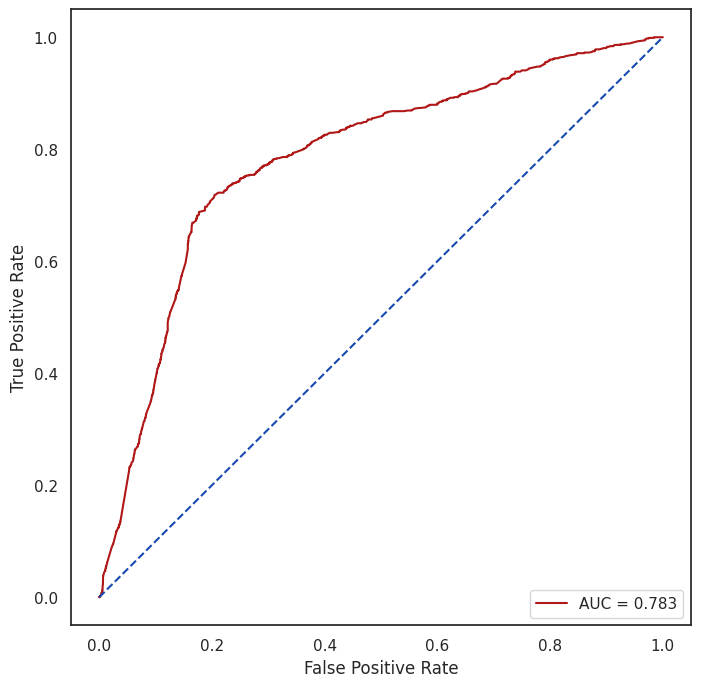

In [ ]:
from xgboost import XGBClassifier

xgb = XGBClassifier(random_state = 2021, learning_rate = 0.01, n_estimators = 100)
xgb.fit(X_train_balanced, Y_train_balanced)
y_pred = xgb.predict(X_test)
y_prob = xgb.predict_proba(X_test)[:,1]

# Metrics
results.iloc[0, 2] = round(precision_score(y_test, y_pred), 2)
results.iloc[1, 2] = round(recall_score(y_test, y_pred), 2)
results.iloc[2, 2] = round(f1_score(y_test, y_pred), 2)
results.iloc[3, 2] = round(roc_auc_score(y_test, y_prob), 3)
xgb_cm = confusion_matrix(y_test, y_pred)

print(classification_report(y_test, y_pred))
print(f'ROC AUC score: {round(roc_auc_score(y_test, y_prob), 3)}')
# Cross-validation scores


# Visualize confusion matrix
plt.figure(figsize = (8, 5))
sns.heatmap(xgb_cm, cmap = 'YlOrBr', annot = True, fmt = 'd', linewidths = 5, cbar = False, annot_kws = {'fontsize': 15},
           yticklabels = ['Not looking for job change', 'Looking for job change'], xticklabels = ['Predicted not looking for job change', 'Predicted looking for job change'])
plt.yticks(rotation = 0)
plt.show()

# Roc curve
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(false_positive_rate, true_positive_rate)

sns.set_theme(style = 'white')
plt.figure(figsize = (8, 8))
plt.plot(false_positive_rate,true_positive_rate, color = '#b01717', label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1], linestyle = '--', color = '#174ab0')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# Feature importance
f_imp3 = pd.DataFrame(columns = ['feature', 'importance'], index = range(X_train_balanced.shape[1]))
for i in range(len(f_imp3.index)):
    f_imp3.iloc[i, 0] = X_train_balanced.columns.to_list()[i]
f_imp3['importance'] = xgb.feature_importances_
f_imp3 = f_imp3.sort_values('importance', ascending = False)
f_imp3[0:11].style.background_gradient(cmap = 'YlOrBr')

### LogisticRegression 76%

              precision    recall  f1-score   support

         0.0       0.86      0.82      0.84      2722
         1.0       0.51      0.58      0.54       879

    accuracy                           0.76      3601
   macro avg       0.69      0.70      0.69      3601
weighted avg       0.77      0.76      0.77      3601

ROC AUC score: 0.762

-----------------------------------------------------

Cross-validation scores with 5 folds:

Accuracy: 0.798
ROC AUC: 0.874
precision: 0.8
recall: 0.79
f1: 0.79


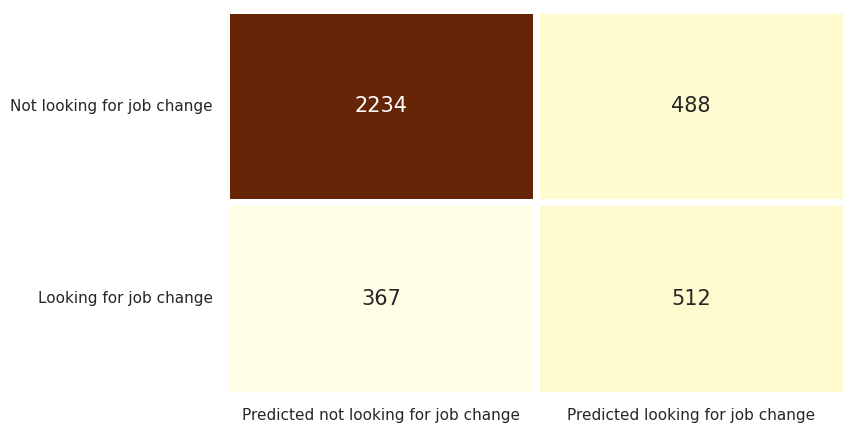

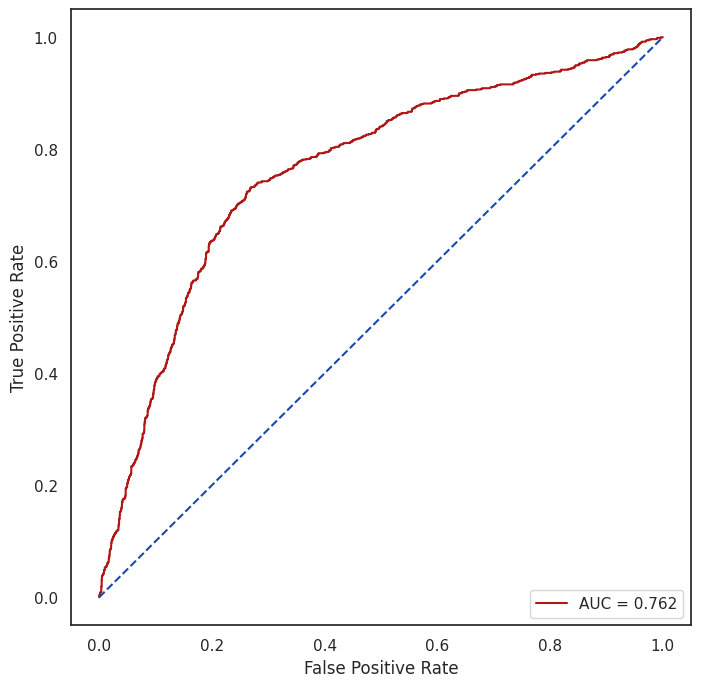

In [ ]:
lg = LogisticRegression(random_state = 2021)
lg.fit(X_train_balanced, Y_train_balanced)
y_pred = lg.predict(X_test)
y_prob = lg.predict_proba(X_test)[:,1]

# Metrics
results.iloc[0, 0] = round(precision_score(y_test, y_pred), 2)
results.iloc[1, 0] = round(recall_score(y_test, y_pred), 2)
results.iloc[2, 0] = round(f1_score(y_test, y_pred), 2)
results.iloc[3, 0] = round(roc_auc_score(y_test, y_prob), 3)
lg_cm = confusion_matrix(y_test, y_pred)

print(classification_report(y_test, y_pred))
print(f'ROC AUC score: {round(roc_auc_score(y_test, y_prob), 3)}')
print('')
print('-----------------------------------------------------')
print('')
print('Cross-validation scores with 5 folds:')
print('')
print(f"Accuracy: {round(cross_val_score(lg, X_train_balanced, Y_train_balanced, cv=5, scoring='accuracy').mean(), 3)}")
print(f"ROC AUC: {round(cross_val_score(lg, X_train_balanced, Y_train_balanced, cv = 5, scoring = 'roc_auc').mean(), 3)}")
print(f"precision: {round(cross_val_score(lg, X_train_balanced, Y_train_balanced, cv = 5, scoring = 'precision').mean(), 2)}")
print(f"recall: {round(cross_val_score(lg, X_train_balanced, Y_train_balanced, cv = 5, scoring = 'recall').mean(), 2)}")
print(f"f1: {round(cross_val_score(lg, X_train_balanced, Y_train_balanced, cv = 5, scoring = 'f1').mean(), 2)}")

# Visualize confusion matrix
plt.figure(figsize = (8, 5))
sns.heatmap(lg_cm, cmap = 'YlOrBr', annot = True, fmt = 'd', linewidths = 5, cbar = False, annot_kws = {'fontsize': 15},
            yticklabels = ['Not looking for job change', 'Looking for job change'], xticklabels = ['Predicted not looking for job change', 'Predicted looking for job change'])
plt.yticks(rotation = 0)
plt.show()

# Roc curve
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(false_positive_rate, true_positive_rate)

sns.set_theme(style = 'white')
plt.figure(figsize = (8, 8))
plt.plot(false_positive_rate,true_positive_rate, color = '#b01717', label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1], linestyle = '--', color = '#174ab0')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# Feature importance
f_imp = pd.DataFrame(columns = ['feature', 'importance (abs coef)'], index = range(X_train_balanced.shape[1])) # Change here
for i in range(len(f_imp.index)):
    f_imp.iloc[i, 0] = X_train_balanced.columns.to_list()[i]
f_imp['importance (abs coef)'] = abs(lg.coef_)[0]
f_imp = f_imp.sort_values('importance (abs coef)', ascending = False)
f_imp[0:11].style.background_gradient(cmap = 'YlOrBr')

###RandomForestClassifier 75%

              precision    recall  f1-score   support

         0.0       0.90      0.76      0.82      2722
         1.0       0.50      0.73      0.59       879

    accuracy                           0.75      3601
   macro avg       0.70      0.75      0.71      3601
weighted avg       0.80      0.75      0.77      3601

ROC AUC score: 0.777

-----------------------------------------------------

Cross-validation scores with 5 folds:

Accuracy: 0.78
ROC AUC: 0.842
precision: 0.76
recall: 0.81
f1: 0.79


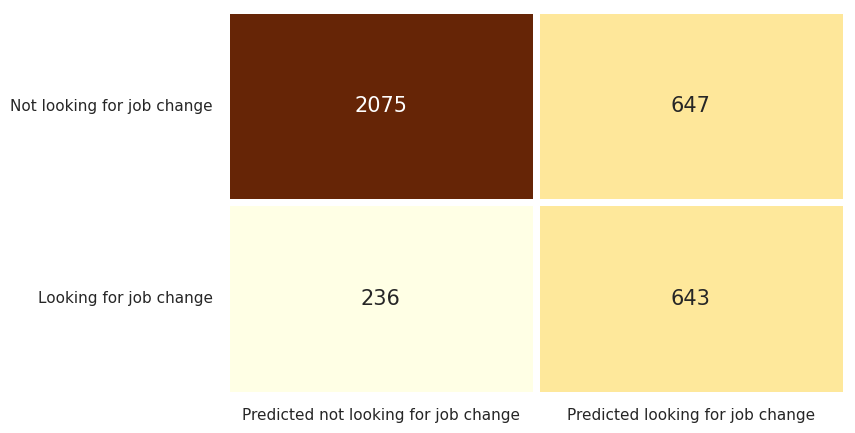

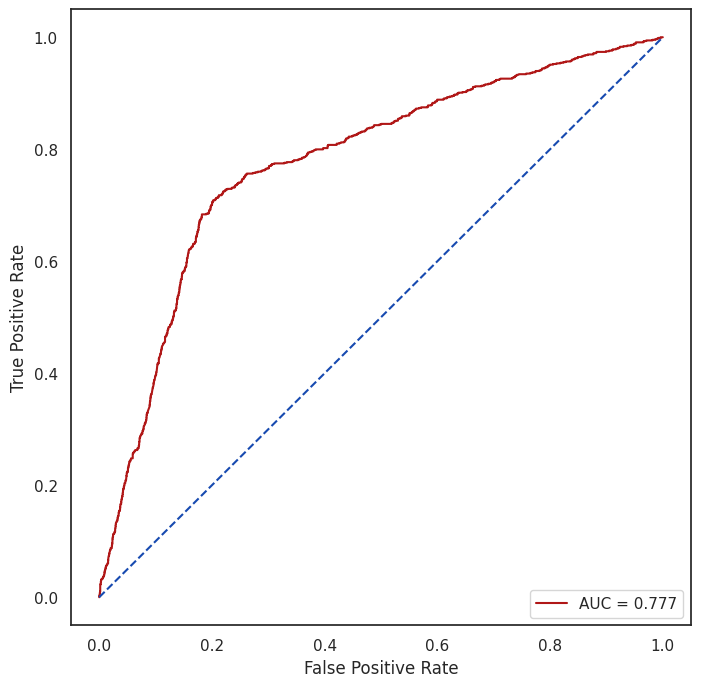

In [ ]:
rf = RandomForestClassifier(random_state = 2021, max_depth = 5)
rf.fit(X_train_balanced, Y_train_balanced)
y_pred = rf.predict(X_test)
y_prob = rf.predict_proba(X_test)[:,1]

# Metrics
results.iloc[0, 1] = round(precision_score(y_test, y_pred), 2)
results.iloc[1, 1] = round(recall_score(y_test, y_pred), 2)
results.iloc[2, 1] = round(f1_score(y_test, y_pred), 2)
results.iloc[3, 1] = round(roc_auc_score(y_test, y_prob), 3)
rf_cm = confusion_matrix(y_test, y_pred)

print(classification_report(y_test, y_pred))
print(f'ROC AUC score: {round(roc_auc_score(y_test, y_prob), 3)}')
print('')
print('-----------------------------------------------------')
print('')
print('Cross-validation scores with 5 folds:')
print('')
print(f"Accuracy: {round(cross_val_score(rf, X_train_balanced, Y_train_balanced, cv=5, scoring='accuracy').mean(), 3)}")
print(f"ROC AUC: {round(cross_val_score(rf, X_train_balanced, Y_train_balanced, cv = 5, scoring = 'roc_auc').mean(), 3)}")
print(f"precision: {round(cross_val_score(rf, X_train_balanced, Y_train_balanced, cv = 5, scoring = 'precision').mean(), 2)}")
print(f"recall: {round(cross_val_score(rf, X_train_balanced, Y_train_balanced, cv = 5, scoring = 'recall').mean(), 2)}")
print(f"f1: {round(cross_val_score(rf, X_train_balanced, Y_train_balanced, cv = 5, scoring = 'f1').mean(), 2)}")

# Visualize confusion matrix
plt.figure(figsize = (8, 5))
sns.heatmap(rf_cm, cmap = 'YlOrBr', annot = True, fmt = 'd', linewidths = 5, cbar = False, annot_kws = {'fontsize': 15},
           yticklabels = ['Not looking for job change', 'Looking for job change'], xticklabels = ['Predicted not looking for job change', 'Predicted looking for job change'])
plt.yticks(rotation = 0)
plt.show()

# Roc curve
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(false_positive_rate, true_positive_rate)

sns.set_theme(style = 'white')
plt.figure(figsize = (8, 8))
plt.plot(false_positive_rate,true_positive_rate, color = '#b01717', label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1], linestyle = '--', color = '#174ab0')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# Feature importance
f_imp2 = pd.DataFrame(columns = ['feature', 'importance'], index = range(X_train_balanced.shape[1])) # Change here: Use the number of features in X_train_balanced
for i in range(len(f_imp2.index)):
    f_imp2.iloc[i, 0] = X_train_balanced.columns.to_list()[i]
f_imp2['importance'] = rf.feature_importances_
f_imp2 = f_imp2.sort_values('importance', ascending = False)
f_imp2[0:11].style.background_gradient(cmap = 'YlOrBr')

###CatBoostClassifier 79%

              precision    recall  f1-score   support

         0.0       0.87      0.86      0.86      2722
         1.0       0.57      0.60      0.59       879

    accuracy                           0.79      3601
   macro avg       0.72      0.73      0.73      3601
weighted avg       0.80      0.79      0.80      3601

ROC AUC score: 0.788

-----------------------------------------------------

Cross-validation scores with 5 folds:

Accuracy: 0.839
ROC AUC: 0.923
precision: 0.85
recall: 0.82
f1: 0.82


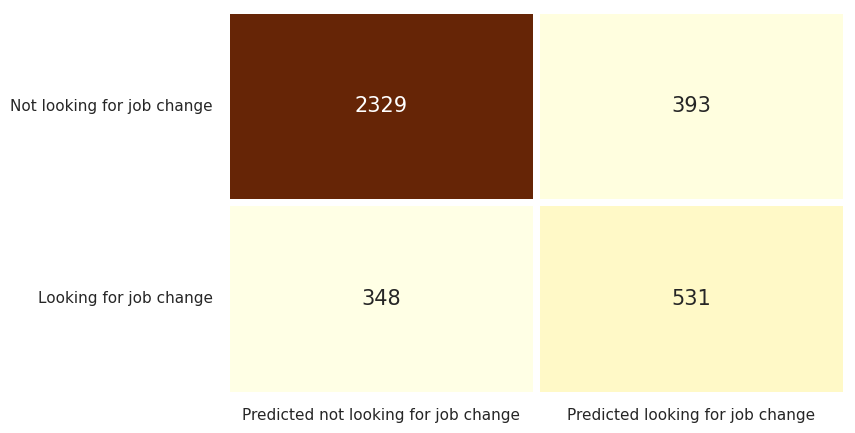

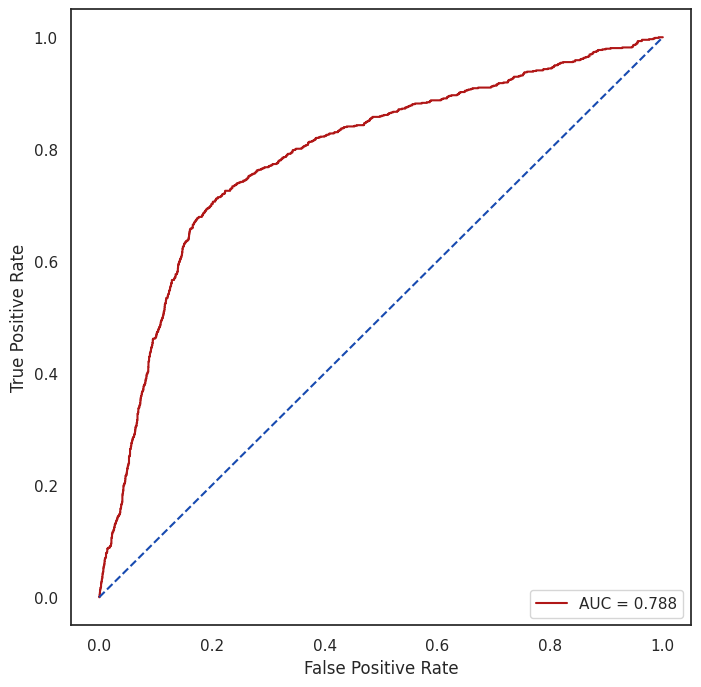

In [ ]:
cb = CatBoostClassifier(random_state = 2021, depth = 5, iterations = 500, verbose = False)
cb.fit(X_train_balanced, Y_train_balanced)
# Use the fitted CatBoostClassifier 'cb' for prediction
y_pred = cb.predict(X_test)
y_prob = cb.predict_proba(X_test)[:,1]
# Metrics
results.iloc[0, 4] = round(precision_score(y_test, y_pred), 2)
results.iloc[1, 4] = round(recall_score(y_test, y_pred), 2)
results.iloc[2, 4] = round(f1_score(y_test, y_pred), 2)
results.iloc[3, 4] = round(roc_auc_score(y_test, y_prob), 3)
cb_cm = confusion_matrix(y_test, y_pred)

print(classification_report(y_test, y_pred))
print(f'ROC AUC score: {round(roc_auc_score(y_test, y_prob), 3)}')
print('')
print('-----------------------------------------------------')
print('')
print('Cross-validation scores with 5 folds:')
print('')
print(f"Accuracy: {round(cross_val_score(cb, X_train_balanced, Y_train_balanced, cv=5, scoring='accuracy').mean(), 3)}")
print(f"ROC AUC: {round(cross_val_score(cb, X_train_balanced, Y_train_balanced, cv = 5, scoring = 'roc_auc').mean(), 3)}")
print(f"precision: {round(cross_val_score(cb, X_train_balanced, Y_train_balanced, cv = 5, scoring = 'precision').mean(), 2)}")
print(f"recall: {round(cross_val_score(cb, X_train_balanced, Y_train_balanced, cv = 5, scoring = 'recall').mean(), 2)}")
print(f"f1: {round(cross_val_score(cb, X_train_balanced, Y_train_balanced, cv = 5, scoring = 'f1').mean(), 2)}")

# Visualize confusion matrix
plt.figure(figsize = (8, 5))
sns.heatmap(cb_cm, cmap = 'YlOrBr', annot = True, fmt = 'd', linewidths = 5, cbar = False, annot_kws = {'fontsize': 15},
           yticklabels = ['Not looking for job change', 'Looking for job change'], xticklabels = ['Predicted not looking for job change', 'Predicted looking for job change'])
plt.yticks(rotation = 0)
plt.show()

# Roc curve
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(false_positive_rate, true_positive_rate)

sns.set_theme(style = 'white')
plt.figure(figsize = (8, 8))
plt.plot(false_positive_rate,true_positive_rate, color = '#b01717', label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1], linestyle = '--', color = '#174ab0')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# Feature importance
f_imp5 = pd.DataFrame(columns = ['feature', 'importance'], index = range(X_train_balanced.shape[1])) # Change here: Use the number of features in X_train_balanced
for i in range(len(f_imp5.index)):
    f_imp5.iloc[i, 0] = X_train_balanced.columns.to_list()[i]
f_imp5['importance'] = cb.feature_importances_
f_imp5 = f_imp5.sort_values('importance', ascending = False)
f_imp5[0:11].style.background_gradient(cmap = 'YlOrBr') # Display top 11 features

###DecisionTreeClassifier 78%

Best hyperparameters: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10}
              precision    recall  f1-score   support

         0.0       0.89      0.81      0.85      2722
         1.0       0.54      0.67      0.60       879

    accuracy                           0.78      3601
   macro avg       0.71      0.74      0.72      3601
weighted avg       0.80      0.78      0.79      3601

ROC AUC score: 0.755
-----------------------------------------------------
Cross-validation scores with 5 folds:
Accuracy: 0.784
ROC AUC: 0.822
precision: 0.77
recall: 0.82
f1: 0.79


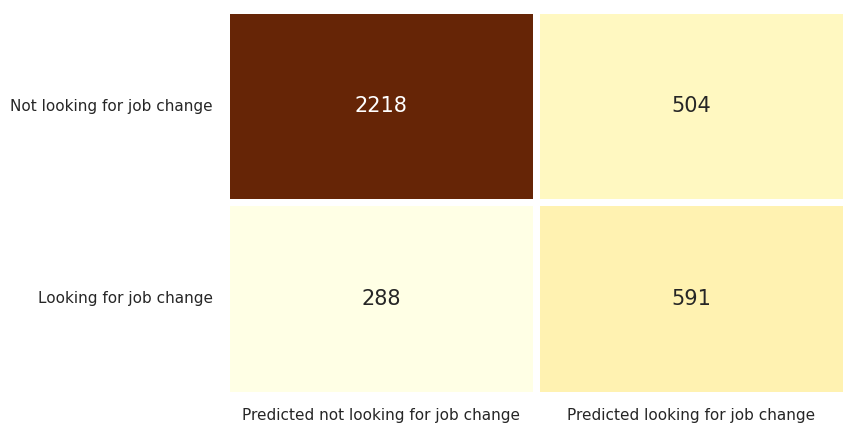

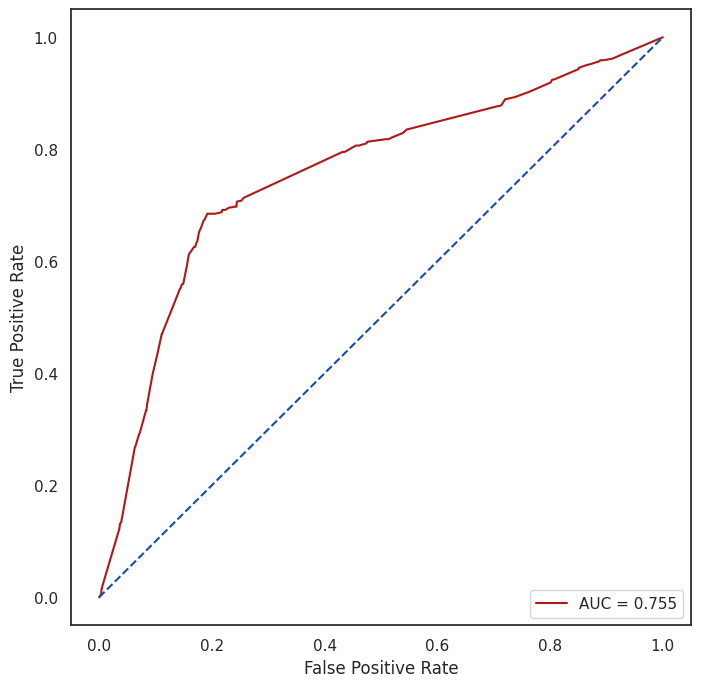

In [ ]:

from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=2021, max_depth=5)  # You can adjust hyperparameters
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [None, 10, 20, 30],  # Experiment with different depths
    'min_samples_split': [2, 5, 10],  # Adjust minimum samples for splitting
    'min_samples_leaf': [1, 2, 4],  # Control minimum samples per leaf node
    'criterion': ['gini', 'entropy', 'log_loss'] # Experiment with different split criteria
}

grid_search = GridSearchCV(estimator=dt, param_grid=param_grid, cv=5, scoring='roc_auc') # Use ROC AUC for scoring
grid_search.fit(X_train_balanced, Y_train_balanced)

best_dt = grid_search.best_estimator_
print("Best hyperparameters:", grid_search.best_params_)

y_pred = best_dt.predict(X_test)
y_prob = best_dt.predict_proba(X_test)[:, 1]

# Evaluate the model (similar to other models)
print(classification_report(y_test, y_pred))
print(f'ROC AUC score: {round(roc_auc_score(y_test, y_prob), 3)}')

print('-----------------------------------------------------')
print('Cross-validation scores with 5 folds:')
print(f"Accuracy: {round(cross_val_score(dt, X_train_balanced, Y_train_balanced, cv=5, scoring='accuracy').mean(), 3)}")
print(f"ROC AUC: {round(cross_val_score(dt, X_train_balanced, Y_train_balanced, cv=5, scoring='roc_auc').mean(), 3)}")
print(f"precision: {round(cross_val_score(dt, X_train_balanced, Y_train_balanced, cv=5, scoring='precision').mean(), 2)}")
print(f"recall: {round(cross_val_score(dt, X_train_balanced, Y_train_balanced, cv=5, scoring='recall').mean(), 2)}")
print(f"f1: {round(cross_val_score(dt, X_train_balanced, Y_train_balanced, cv=5, scoring='f1').mean(), 2)}")


dt_cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 5))
sns.heatmap(dt_cm, cmap='YlOrBr', annot=True, fmt='d', linewidths=5, cbar=False, annot_kws={'fontsize': 15},
           yticklabels=['Not looking for job change', 'Looking for job change'], xticklabels=['Predicted not looking for job change', 'Predicted looking for job change'])
plt.yticks(rotation=0)
plt.show()

# Roc curve
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(false_positive_rate, true_positive_rate)

sns.set_theme(style='white')
plt.figure(figsize=(8, 8))
plt.plot(false_positive_rate, true_positive_rate, color='#b01717', label='AUC = %0.3f' % roc_auc)
plt.legend(loc='lower right')
plt.plot([0, 1], [0, 1], linestyle='--', color='#174ab0')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# Feature Importance
f_imp_dt = pd.DataFrame(columns=['feature', 'importance'], index=range(X_train_balanced.shape[1]))
for i in range(len(f_imp_dt.index)):
    f_imp_dt.iloc[i, 0] = X_train_balanced.columns.to_list()[i]
# Use best_dt instead of dt to access feature importances
f_imp_dt['importance'] = best_dt.feature_importances_
f_imp_dt = f_imp_dt.sort_values('importance', ascending=False)
f_imp_dt[0:11].style.background_gradient(cmap='YlOrBr')

# Add Decision Tree results to the results DataFrame
results['DT'] = [
    round(precision_score(y_test, y_pred), 2),
    round(recall_score(y_test, y_pred), 2),
    round(f1_score(y_test, y_pred), 2),
    round(roc_auc_score(y_test, y_prob), 3)
]


###KNN 72%

Best hyperparameters: {'metric': 'manhattan', 'n_neighbors': 5, 'weights': 'distance'}
              precision    recall  f1-score   support

         0.0       0.84      0.78      0.81      2722
         1.0       0.44      0.54      0.49       879

    accuracy                           0.72      3601
   macro avg       0.64      0.66      0.65      3601
weighted avg       0.74      0.72      0.73      3601

ROC AUC score: 0.724
-----------------------------------------------------
Cross-validation scores with 5 folds:
Accuracy: 0.837
ROC AUC: 0.911
precision: 0.8
recall: 0.91
f1: 0.85


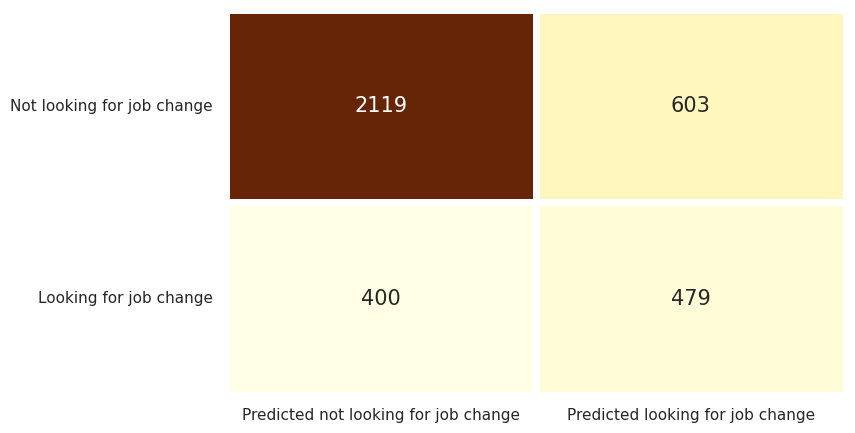

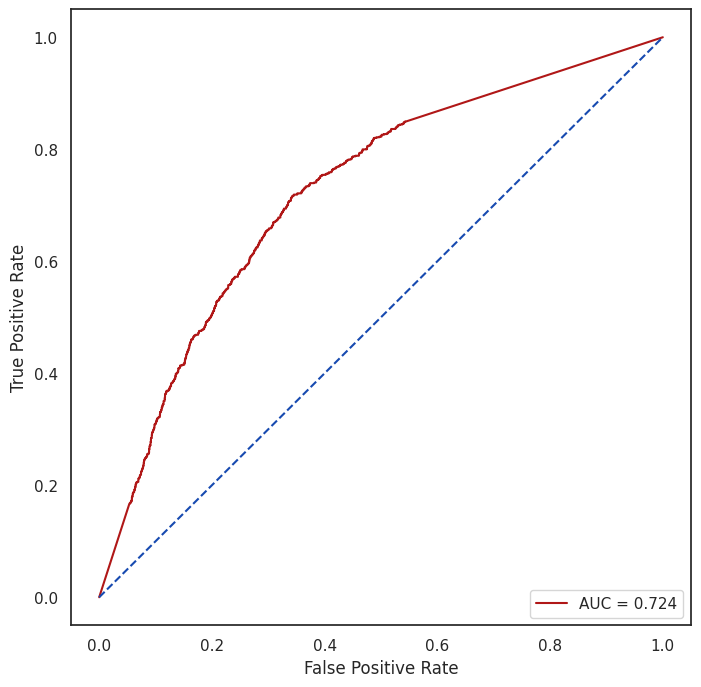

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

# KNN Classifier
knn = KNeighborsClassifier()

# Hyperparameter tuning using GridSearchCV
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],  # Experiment with different numbers of neighbors
    'weights': ['uniform', 'distance'],  # Experiment with different weight functions
    'metric': ['euclidean', 'manhattan', 'minkowski'] # Experiment with different distance metrics
}

grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, cv=5, scoring='roc_auc')
grid_search.fit(X_train_balanced, Y_train_balanced)

best_knn = grid_search.best_estimator_
print("Best hyperparameters:", grid_search.best_params_)

y_pred = best_knn.predict(X_test)
y_prob = best_knn.predict_proba(X_test)[:, 1]

# Evaluate the model
print(classification_report(y_test, y_pred))
print(f'ROC AUC score: {round(roc_auc_score(y_test, y_prob), 3)}')

print('-----------------------------------------------------')
print('Cross-validation scores with 5 folds:')
print(f"Accuracy: {round(cross_val_score(best_knn, X_train_balanced, Y_train_balanced, cv=5, scoring='accuracy').mean(), 3)}")
print(f"ROC AUC: {round(cross_val_score(best_knn, X_train_balanced, Y_train_balanced, cv=5, scoring='roc_auc').mean(), 3)}")
print(f"precision: {round(cross_val_score(best_knn, X_train_balanced, Y_train_balanced, cv=5, scoring='precision').mean(), 2)}")
print(f"recall: {round(cross_val_score(best_knn, X_train_balanced, Y_train_balanced, cv=5, scoring='recall').mean(), 2)}")
print(f"f1: {round(cross_val_score(best_knn, X_train_balanced, Y_train_balanced, cv=5, scoring='f1').mean(), 2)}")

knn_cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 5))
sns.heatmap(knn_cm, cmap='YlOrBr', annot=True, fmt='d', linewidths=5, cbar=False, annot_kws={'fontsize': 15},
           yticklabels=['Not looking for job change', 'Looking for job change'], xticklabels=['Predicted not looking for job change', 'Predicted looking for job change'])
plt.yticks(rotation=0)
plt.show()

# Roc curve
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(false_positive_rate, true_positive_rate)

sns.set_theme(style='white')
plt.figure(figsize=(8, 8))
plt.plot(false_positive_rate, true_positive_rate, color='#b01717', label='AUC = %0.3f' % roc_auc)
plt.legend(loc='lower right')
plt.plot([0, 1], [0, 1], linestyle='--', color='#174ab0')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# Add KNN results to the results DataFrame
results['KNN'] = [
    round(precision_score(y_test, y_pred), 2),
    round(recall_score(y_test, y_pred), 2),
    round(f1_score(y_test, y_pred), 2),
    round(roc_auc_score(y_test, y_prob), 3)
]

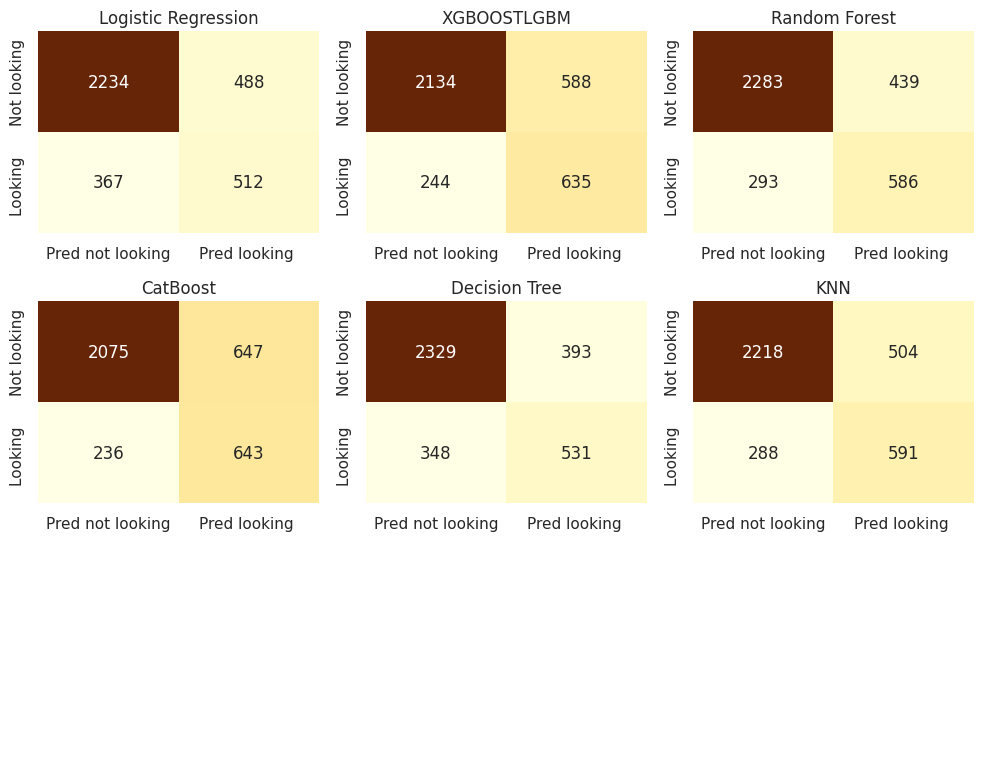

In [ ]:
# prompt: kumpulkan hasil confusion metrix prediksi semua 7 model menjadi grafik yang lebih kecil

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

def plot_confusion_matrices(confusion_matrices, model_names, figsize=(10, 8)):
    """Plots multiple confusion matrices in a grid.

    Args:
        confusion_matrices: A list of confusion matrices.
        model_names: A list of model names corresponding to the confusion matrices.
        figsize: Figure size for the plot.
    """
    num_models = len(confusion_matrices)
    num_cols = 3  # Adjust the number of columns in the grid as needed
    num_rows = (num_models + num_cols - 1) // num_cols

    fig, axes = plt.subplots(num_rows, num_cols, figsize=figsize)
    axes = axes.flatten()

    for i, (cm, model_name) in enumerate(zip(confusion_matrices, model_names)):
        sns.heatmap(cm, annot=True, fmt='d', cmap='YlOrBr', cbar=False, ax=axes[i],
                    yticklabels=['Not looking', 'Looking '], xticklabels=['Pred not looking', 'Pred looking '])
        axes[i].set_title(model_name)

    for j in range(i + 1, len(axes)):  # Hide unused subplots
        axes[j].axis('off')

    plt.tight_layout()
    plt.show()


# Example usage (replace with your actual confusion matrices and model names):
confusion_matrices = [lg_cm, xgb_cm, lgbm_cm, rf_cm, cb_cm, dt_cm, knn_cm]  # Add other confusion matrices here
model_names = ['Logistic Regression', 'XGBOOST' 'LGBM', 'Random Forest', 'CatBoost', 'Decision Tree', 'KNN'] #add other model names here

plot_confusion_matrices(confusion_matrices, model_names)

# New Section

Berdasarkan hasil analisis data dan performa beberapa model klasifikasi (Logistic Regression, Random Forest, CatBoost, Decision Tree, dan KNN), dapat disimpulkan bahwa model **CatBoostClassifier mencapai akurasi tertinggi (79%)** dalam memprediksi karyawan yang sedang mencari pekerjaan baru.  Meskipun model lain seperti Logistic Regression dan Decision Tree juga menunjukkan performa yang baik (76% dan 78%), CatBoost sedikit unggul.

**Insights:**

* **Variabel penting:**  Perhatikan variabel-variabel yang memiliki bobot/importance tinggi dalam setiap model. Variabel-variabel ini menjadi faktor kunci dalam menentukan apakah seorang karyawan sedang mencari pekerjaan baru atau tidak.  Analisis lebih lanjut terhadap variabel-variabel ini diperlukan untuk memahami korelasinya dengan *employee turnover*.
* **Performa model:** Meskipun CatBoost memiliki akurasi tertinggi, penting untuk mempertimbangkan *trade-off* antara akurasi, *precision*, *recall*, dan *F1-score*.  Pilihlah model yang paling sesuai dengan kebutuhan bisnis, misalnya jika *false positive* lebih merugikan daripada *false negative*, maka prioritaskan *precision*.
* **ROC AUC Score:** Skor ROC AUC yang baik pada semua model mengindikasikan kemampuan model untuk membedakan antara karyawan yang mencari dan tidak mencari pekerjaan baru.

**Rekomendasi Bisnis:**

1. **Fokus pada faktor-faktor kunci:**  Prioritaskan upaya retensi karyawan dengan fokus pada variabel-variabel yang paling berpengaruh terhadap *employee turnover* (seperti yang ditunjukkan oleh *feature importance*). Misalnya, jika "gaji" atau "kesempatan promosi" merupakan variabel penting, maka perusahaan perlu meninjau kebijakan gaji dan pengembangan karir.
2. **Implementasi model prediktif:** Gunakan model CatBoost (atau model terbaik lainnya setelah evaluasi lebih lanjut) untuk mengidentifikasi karyawan yang berpotensi keluar.  Hal ini memungkinkan perusahaan untuk melakukan intervensi lebih dini, seperti memberikan tawaran yang lebih baik atau memberikan kesempatan pengembangan karir.
3. **Survei dan umpan balik:**  Lakukan survei rutin kepada karyawan untuk mengetahui tingkat kepuasan dan alasan potensial mereka untuk mencari pekerjaan baru.  Umpan balik ini akan memberikan data kualitatif yang dapat melengkapi data kuantitatif dan meningkatkan akurasi model prediktif.
4. **Program retensi karyawan:** Kembangkan program retensi karyawan yang komprehensif, yang mencakup peningkatan gaji, pengembangan karir, peningkatan kesejahteraan karyawan, dan pengakuan atas prestasi.  Program ini harus disesuaikan dengan faktor-faktor kunci yang telah diidentifikasi.
5. **Monitoring dan evaluasi:** Secara berkala pantau kinerja model dan perbarui model tersebut dengan data terbaru.  Evaluasi efektivitas program retensi karyawan dan sesuaikan strategi jika diperlukan.


**Catatan:**  Rekomendasi di atas bersifat umum.  Rekomendasi yang lebih spesifik dan efektif memerlukan analisis lebih lanjut terhadap data dan konteks bisnis yang lebih rinci.
